In [1]:
import os
import os.path as osp
import random
import torch
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import pytorch_warmup as warmup
from scipy.stats import pearsonr, spearmanr, kendalltau
import wandb
from datasets import create_datalists, create_datasets
from models.get_models import get_model
import output
from validate import valid
import analysis
from analysis.util import plot_dist

In [2]:
torch.cuda.set_device(1)

configs = {
    'pretrain': 'None',
    'img_size': 512,
    'model': 'Resnet18',
    'epochs': 100,
    'batch_size': 32,
    'weight_decay': 1e-3,
    'lr': 1e-4,
    'min_lr': 0.000006463,
    'RandomHorizontalFlip': True,
    'RandomVerticalFlip': True,
    'RandomRotation': True,
    'ZoomIn': False,
    'ZoomOut': False,
    'use_mix': False,
    'use_avg': False,
    'XShift': False,
    'YShift': False,
    'RandomShear': False,
    'max_shear': 30,  # value in degrees
    'max_shift': 0.5,
    'rotation_angle': 3,
    'zoomin_factor': 0.95,
    'zoomout_factor': 0.05,
}

imgs_list, label_list = create_datalists()

test_dataset, _ = create_datasets(imgs_list, label_list, configs, final_train=True,
                                  patients_out=False, patient_ids_out=[1, 2, 3])
print(len(test_dataset))

model = get_model({'model': 'Ensemble', 'pretrain': 'None'})
# model.load_state_dict(torch.load(osp.join(osp.dirname(output.__file__), 'DNCNN_epoch_179_alldata.pth'), map_location="cpu"), strict=True)
# model = model.cuda()

bad_pred_indices = valid(model, test_dataset, 0, 0, 0, False, loss_threshold=0.5)
len(bad_pred_indices)

1000


C:\ProgramData\Anaconda3\envs\CTImageQuality\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\CTImageQuality\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
validation: 100%|██████████| 1000/1000 [00:13<00:00, 74.84it/s, plcc=0.968, srocc=0.968, krocc=0.862, overall=2.8, std=0.267]


88

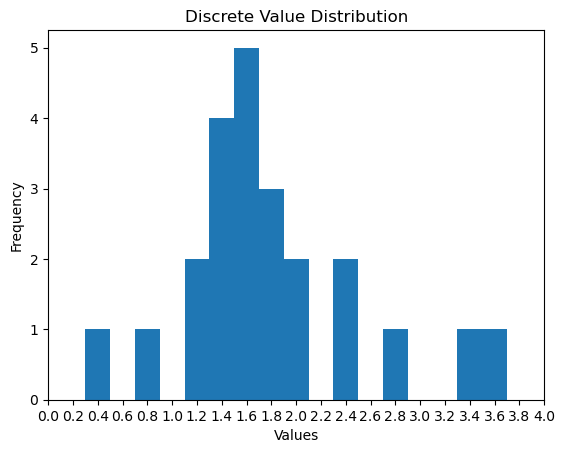

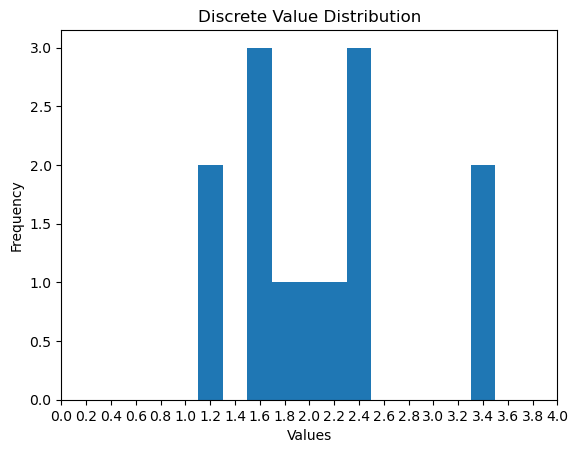

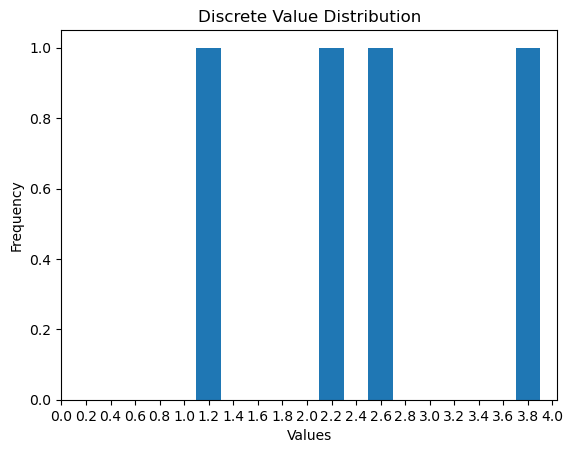

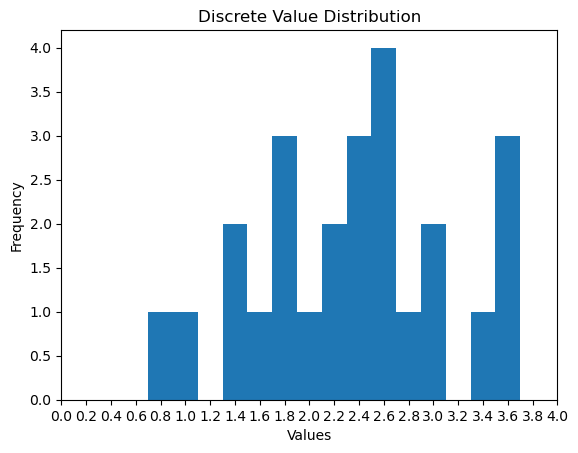

In [3]:
patient_ids = np.loadtxt(osp.join(osp.dirname(analysis.__file__), 'labels.txt'))
per_patient_worst = []
per_patient_worst_labels = []

for p in range(4):
    patient_ids_out = [p]
    patient_indices = [i for i, x in enumerate(patient_ids) if x in patient_ids_out]
    #
    # plot_dist(labels)
    per_patient_worst_indices = [i for i in bad_pred_indices if i in patient_indices]
    per_patient_worst.append(per_patient_worst_indices)

    labels = [label_list[i] for i in per_patient_worst_indices]
    per_patient_worst_labels.append(labels)
    plot_dist(labels)

In [13]:
for p in range(4):
    print(len(per_patient_worst[p]))

14
12
4
14


In [3]:
torch.cuda.set_device(1)

configs = {
    'pretrain': 'None',
    'img_size': 512,
    'model': 'Resnet18',
    'epochs': 100,
    'batch_size': 32,
    'weight_decay': 1e-3,
    'lr': 1e-4,
    'min_lr': 0.000006463,
    'RandomHorizontalFlip': True,
    'RandomVerticalFlip': True,
    'RandomRotation': True,
    'ZoomIn': False,
    'ZoomOut': False,
    'use_mix': False,
    'use_avg': False,
    'XShift': False,
    'YShift': False,
    'RandomShear': False,
    'max_shear': 30,  # value in degrees
    'max_shift': 0.5,
    'rotation_angle': 3,
    'zoomin_factor': 0.95,
    'zoomout_factor': 0.05,
}

imgs_list, label_list = create_datalists()

test_dataset, _ = create_datasets(imgs_list, label_list, configs, final_train=True,
                                  patients_out=False, patient_ids_out=[1, 2, 3])
print(len(test_dataset))

model = get_model({'model': 'ED_CNN', 'pretrain': 'None'})
model.load_state_dict(torch.load(osp.join(osp.dirname(output.__file__), 'ED_CNN_epoch_174_alldata.pth'), map_location="cpu"), strict=True)
model = model.cuda()

bad_pred_indices = valid(model, test_dataset, 0, 0, 0, False, loss_threshold=0.5)
len(bad_pred_indices)

1000


validation:   0%|          | 5/1000 [00:00<01:04, 15.53it/s]

pred: [2.6814942]
true: 2.8
#
pred: [1.7936195]
true: 1.8
#
pred: [3.261887]
true: 3.4
#
pred: [2.1627812]
true: 2.0
#
pred: [1.8311859]
true: 2.0
#
pred: [0.5498728]
true: 0.2
#
pred: [0.15346123]
true: 0.6
#


validation:   1%|          | 11/1000 [00:00<00:43, 22.82it/s]

pred: [3.6460881]
true: 4.0
#
pred: [0.2645874]
true: 0.0
#
pred: [1.7604952]
true: 1.6
#
pred: [3.8601398]
true: 4.0
#
pred: [2.3663778]
true: 2.2
#
pred: [0.7609234]
true: 0.6
#


validation:   2%|▏         | 20/1000 [00:00<00:35, 27.42it/s]

pred: [2.5847144]
true: 2.4
#
pred: [1.4809742]
true: 1.2
#
pred: [3.5684536]
true: 4.0
#
pred: [2.0954351]
true: 2.0
#
pred: [0.3818647]
true: 0.6
#
pred: [1.3467507]
true: 1.4
#
pred: [3.3213673]
true: 3.6
#


validation:   3%|▎         | 26/1000 [00:01<00:34, 28.19it/s]

pred: [1.6245238]
true: 1.6
#
pred: [0.14408842]
true: 0.2
#
pred: [3.682888]
true: 3.8
#
pred: [2.5858805]
true: 2.2
#
pred: [0.8198349]
true: 1.0
#
pred: [3.5593648]
true: 3.8
#
pred: [0.8315874]
true: 1.4
#


validation:   3%|▎         | 32/1000 [00:01<00:34, 28.37it/s]

pred: [2.2240963]
true: 2.2
#
pred: [2.100327]
true: 2.2
#
pred: [0.22963455]
true: 0.4
#
pred: [3.1444397]
true: 3.2
#
pred: [1.9803156]
true: 1.8
#
pred: [1.5903594]
true: 1.8
#


validation:   4%|▍         | 38/1000 [00:01<00:33, 28.86it/s]

pred: [0.79941314]
true: 0.8
#
pred: [1.2850055]
true: 1.6
#
pred: [0.97623694]
true: 1.4
#
pred: [0.83032143]
true: 1.0
#
pred: [3.7217023]
true: 4.0
#
pred: [0.9741124]
true: 1.0
#
pred: [1.6623676]
true: 1.8
#


validation:   4%|▍         | 44/1000 [00:01<00:33, 28.92it/s]

pred: [1.9251491]
true: 1.6
#
pred: [2.8191288]
true: 2.8
#
pred: [3.2432902]
true: 3.2
#
pred: [3.092254]
true: 3.4
#
pred: [2.0677898]
true: 1.8
#
pred: [1.9455851]
true: 1.4
#


validation:   5%|▌         | 51/1000 [00:01<00:32, 29.42it/s]

pred: [0.7813336]
true: 0.6
#
pred: [1.5081967]
true: 1.4
#
pred: [2.5482352]
true: 2.4
#
pred: [2.9998806]
true: 2.8
#
pred: [1.7292325]
true: 1.8
#
pred: [2.7662926]
true: 2.6
#


validation:   6%|▌         | 57/1000 [00:02<00:32, 29.07it/s]

pred: [2.4876022]
true: 2.4
#
pred: [3.3767586]
true: 3.2
#
pred: [1.8367275]
true: 1.6
#
pred: [3.1119964]
true: 3.2
#
pred: [2.307566]
true: 2.2
#
pred: [0.9127672]
true: 1.4
#
pred: [1.8447529]
true: 1.4
#


validation:   6%|▋         | 64/1000 [00:02<00:32, 29.00it/s]

pred: [3.27479]
true: 3.4
#
pred: [2.2157662]
true: 2.0
#
pred: [0.70756906]
true: 0.6
#
pred: [1.2733777]
true: 1.2
#
pred: [2.0158443]
true: 1.8
#
pred: [2.6352758]
true: 2.6
#


validation:   7%|▋         | 70/1000 [00:02<00:31, 29.08it/s]

pred: [3.3609922]
true: 3.0
#
pred: [1.9130216]
true: 2.0
#
pred: [0.64686567]
true: 0.8
#
pred: [2.1997144]
true: 2.4
#
pred: [2.7995985]
true: 2.6
#
pred: [3.828337]
true: 3.8
#
pred: [1.4562212]
true: 1.4
#


validation:   8%|▊         | 79/1000 [00:02<00:31, 29.14it/s]

pred: [2.602861]
true: 2.6
#
pred: [0.8541727]
true: 0.4
#
pred: [1.8175896]
true: 1.4
#
pred: [0.6371572]
true: 0.0
#
pred: [2.8747244]
true: 2.6
#
pred: [2.5818748]
true: 2.4
#
pred: [2.7832813]
true: 3.0
#


validation:   8%|▊         | 85/1000 [00:03<00:31, 29.10it/s]

pred: [0.8988645]
true: 1.2
#
pred: [0.37690097]
true: 0.4
#
pred: [0.26681325]
true: 0.2
#
pred: [3.3373039]
true: 3.6
#
pred: [1.699308]
true: 1.4
#
pred: [2.7240946]
true: 2.4
#
pred: [3.216524]
true: 3.6
#


validation:   9%|▉         | 91/1000 [00:03<00:31, 29.11it/s]

pred: [3.190678]
true: 3.0
#
pred: [3.0668733]
true: 3.0
#
pred: [2.630556]
true: 2.8
#
pred: [3.1489177]
true: 3.0
#
pred: [1.0877166]
true: 1.2
#
pred: [3.748303]
true: 3.6
#


validation:  10%|▉         | 97/1000 [00:03<00:31, 28.94it/s]

pred: [1.8095185]
true: 1.4
#
pred: [2.4221416]
true: 2.6
#
pred: [0.22031812]
true: 0.2
#
pred: [0.9134187]
true: 0.8
#
pred: [1.445744]
true: 2.0
#
pred: [3.9246745]
true: 4.0
#


validation:  10%|█         | 104/1000 [00:03<00:30, 29.51it/s]

pred: [1.2789736]
true: 1.8
#
pred: [3.243289]
true: 3.0
#
pred: [3.6585336]
true: 4.0
#
pred: [3.5524783]
true: 4.0
#
pred: [3.2480693]
true: 3.6
#
pred: [3.2986705]
true: 3.0
#
pred: [1.9437354]
true: 1.8
#


validation:  11%|█         | 110/1000 [00:03<00:30, 29.31it/s]

pred: [1.1992142]
true: 1.4
#
pred: [2.8871903]
true: 3.0
#
pred: [1.1408836]
true: 0.8
#
pred: [3.8085485]
true: 4.0
#
pred: [1.9912248]
true: 2.0
#
pred: [3.1016583]
true: 3.0
#
pred: [0.23636535]
true: 0.2
#


validation:  12%|█▏        | 117/1000 [00:04<00:29, 29.48it/s]

pred: [0.6347875]
true: 1.2
#
pred: [1.7129852]
true: 1.8
#
pred: [2.9264343]
true: 3.0
#
pred: [1.0049772]
true: 0.8
#
pred: [2.5184994]
true: 2.4
#
pred: [1.5019085]
true: 1.2
#


validation:  12%|█▏        | 124/1000 [00:04<00:29, 29.47it/s]

pred: [3.148369]
true: 3.0
#
pred: [0.26478907]
true: 0.2
#
pred: [1.836861]
true: 2.2
#
pred: [3.4653563]
true: 3.6
#
pred: [3.7508407]
true: 4.0
#
pred: [2.6432908]
true: 2.6
#
pred: [0.85456914]
true: 1.4
#


validation:  13%|█▎        | 131/1000 [00:04<00:28, 30.58it/s]

pred: [2.0365658]
true: 2.4
#
pred: [1.6697801]
true: 1.6
#
pred: [0.5334722]
true: 0.4
#
pred: [3.933906]
true: 3.8
#
pred: [0.98350924]
true: 1.0
#
pred: [1.9823736]
true: 2.0
#


validation:  14%|█▎        | 135/1000 [00:04<00:29, 29.26it/s]

pred: [3.406181]
true: 3.4
#
pred: [1.9819652]
true: 2.2
#
pred: [2.9103541]
true: 2.8
#
pred: [2.0918825]
true: 2.0
#
pred: [0.9121718]
true: 1.0
#
pred: [3.3253617]
true: 3.0
#


validation:  14%|█▍        | 144/1000 [00:05<00:29, 29.18it/s]

pred: [1.0955673]
true: 0.8
#
pred: [1.3908863]
true: 2.0
#
pred: [0.71356165]
true: 1.0
#
pred: [2.4174347]
true: 2.4
#
pred: [1.507899]
true: 1.8
#
pred: [1.2448918]
true: 1.2
#
pred: [2.36843]
true: 2.6
#


validation:  15%|█▍        | 148/1000 [00:05<00:28, 29.48it/s]

pred: [1.5228164]
true: 1.2
#
pred: [1.8309635]
true: 1.8
#
pred: [3.3371062]
true: 3.4
#
pred: [1.4612554]
true: 1.2
#
pred: [0.5297782]
true: 0.4
#
pred: [2.5798638]
true: 2.6
#
pred: [0.57493246]
true: 0.4
#


validation:  16%|█▌        | 155/1000 [00:05<00:28, 29.41it/s]

pred: [2.726032]
true: 2.6
#
pred: [2.6255505]
true: 2.6
#
pred: [1.8584049]
true: 2.0
#
pred: [3.391977]
true: 3.0
#
pred: [1.8376311]
true: 2.0
#
pred: [2.600806]
true: 2.6
#


validation:  16%|█▋        | 164/1000 [00:05<00:28, 29.41it/s]

pred: [2.8600109]
true: 2.6
#
pred: [3.1370628]
true: 3.6
#
pred: [2.7344003]
true: 2.6
#
pred: [0.34180096]
true: 0.6
#
pred: [2.6708126]
true: 2.4
#
pred: [3.0433052]
true: 3.2
#
pred: [3.6969543]
true: 3.8
#


validation:  17%|█▋        | 170/1000 [00:06<00:28, 29.32it/s]

pred: [2.9750001]
true: 2.4
#
pred: [1.5371417]
true: 1.4
#
pred: [3.776784]
true: 4.0
#
pred: [3.1657314]
true: 3.0
#
pred: [1.5985837]
true: 1.6
#
pred: [2.4365604]
true: 2.4
#


validation:  18%|█▊        | 176/1000 [00:06<00:28, 29.24it/s]

pred: [1.6283157]
true: 1.6
#
pred: [3.448232]
true: 3.8
#
pred: [2.1998084]
true: 2.6
#
pred: [2.7626953]
true: 2.6
#
pred: [1.0207144]
true: 1.0
#
pred: [2.041582]
true: 2.2
#
pred: [2.5477133]
true: 2.4
#


validation:  18%|█▊        | 182/1000 [00:06<00:27, 29.27it/s]

pred: [3.7727454]
true: 3.8
#
pred: [1.2267919]
true: 1.4
#
pred: [1.549555]
true: 1.0
#
pred: [3.78568]
true: 4.0
#
pred: [1.3788692]
true: 1.4
#
pred: [0.64978236]
true: 1.0
#


validation:  19%|█▉        | 188/1000 [00:06<00:27, 29.34it/s]

pred: [0.76886374]
true: 0.6
#
pred: [0.8906331]
true: 1.2
#
pred: [1.7708925]
true: 2.2
#
pred: [2.6800222]
true: 2.6
#
pred: [0.21570729]
true: 0.0
#
pred: [0.10843042]
true: 0.0
#
pred: [3.5484052]
true: 3.0
#


validation:  20%|█▉        | 195/1000 [00:06<00:26, 29.88it/s]

pred: [3.047963]
true: 2.6
#
pred: [0.54275155]
true: 0.8
#
pred: [3.709082]
true: 3.4
#
pred: [2.2324877]
true: 1.6
#
pred: [1.5854532]
true: 1.6
#
pred: [2.6018972]
true: 2.4
#
pred: [3.23494]
true: 3.6
#


validation:  20%|██        | 201/1000 [00:07<00:27, 28.91it/s]

pred: [1.4413633]
true: 1.8
#
pred: [1.586754]
true: 1.2
#
pred: [2.0746167]
true: 2.2
#
pred: [2.9502397]
true: 2.4
#
pred: [1.855364]
true: 1.8
#
pred: [1.4601923]
true: 1.6
#


validation:  21%|██        | 210/1000 [00:07<00:27, 29.15it/s]

pred: [2.441782]
true: 2.6
#
pred: [1.9359766]
true: 2.0
#
pred: [2.8363056]
true: 2.8
#
pred: [2.9389803]
true: 2.6
#
pred: [3.2971632]
true: 3.0
#
pred: [0.1737701]
true: 0.0
#
pred: [1.467816]
true: 1.6
#


validation:  22%|██▏       | 216/1000 [00:07<00:27, 29.03it/s]

pred: [1.7461644]
true: 1.6
#
pred: [0.94587904]
true: 1.0
#
pred: [0.32945758]
true: 0.4
#
pred: [0.9741687]
true: 0.8
#
pred: [3.2127378]
true: 3.2
#
pred: [3.8801134]
true: 3.8
#


validation:  22%|██▏       | 222/1000 [00:07<00:26, 29.33it/s]

pred: [3.3180618]
true: 3.4
#
pred: [2.5847223]
true: 3.0
#
pred: [2.5762815]
true: 2.4
#
pred: [0.8520777]
true: 0.6
#
pred: [2.2803066]
true: 2.0
#
pred: [3.3975325]
true: 3.0
#
pred: [1.3539097]
true: 1.4
#


validation:  23%|██▎       | 228/1000 [00:08<00:26, 29.17it/s]

pred: [2.0778527]
true: 1.6
#
pred: [2.126571]
true: 1.8
#
pred: [2.0894501]
true: 1.8
#
pred: [2.2543328]
true: 2.4
#
pred: [0.6835508]
true: 0.8
#
pred: [0.8720182]
true: 0.8
#
pred: [3.348564]
true: 3.6
#


validation:  24%|██▎       | 235/1000 [00:08<00:26, 29.10it/s]

pred: [3.254258]
true: 3.4
#
pred: [0.65370905]
true: 0.8
#
pred: [3.777243]
true: 4.0
#
pred: [3.4625297]
true: 3.4
#
pred: [1.9445883]
true: 2.0
#
pred: [0.48274395]
true: 0.2
#


validation:  24%|██▍       | 241/1000 [00:08<00:26, 28.93it/s]

pred: [1.7635897]
true: 1.8
#
pred: [1.7355782]
true: 2.2
#
pred: [3.159806]
true: 3.6
#
pred: [0.77156335]
true: 0.8
#
pred: [1.5999283]
true: 1.4
#
pred: [1.7344047]
true: 1.8
#
pred: [2.6843665]
true: 2.8
#


validation:  25%|██▍       | 248/1000 [00:08<00:25, 29.33it/s]

pred: [1.6923238]
true: 1.4
#
pred: [1.8606371]
true: 2.0
#
pred: [1.2371842]
true: 1.8
#
pred: [3.0857015]
true: 3.0
#
pred: [2.9732866]
true: 3.6
#
pred: [1.33171]
true: 1.2
#


validation:  25%|██▌       | 254/1000 [00:08<00:25, 29.37it/s]

pred: [1.9826496]
true: 1.8
#
pred: [1.179718]
true: 1.2
#
pred: [3.2352304]
true: 3.2
#
pred: [0.24060774]
true: 0.2
#
pred: [0.89369327]
true: 1.0
#
pred: [2.626995]
true: 2.6
#


validation:  26%|██▌       | 260/1000 [00:09<00:25, 29.12it/s]

pred: [2.016641]
true: 2.4
#
pred: [1.0005248]
true: 0.8
#
pred: [1.1237835]
true: 1.0
#
pred: [3.217304]
true: 3.6
#
pred: [0.6812591]
true: 0.8
#
pred: [3.1957295]
true: 3.4
#
pred: [3.503786]
true: 3.6
#


validation:  27%|██▋       | 267/1000 [00:09<00:25, 28.90it/s]

pred: [1.0532978]
true: 1.0
#
pred: [1.8675307]
true: 1.6
#
pred: [1.0095831]
true: 1.0
#
pred: [2.2579105]
true: 1.8
#
pred: [0.10137946]
true: 0.0
#
pred: [2.4364712]
true: 2.2
#


validation:  27%|██▋       | 274/1000 [00:09<00:24, 29.16it/s]

pred: [2.1388843]
true: 1.4
#
pred: [2.1357236]
true: 2.2
#
pred: [2.8125925]
true: 3.0
#
pred: [3.6942182]
true: 3.8
#
pred: [1.6649227]
true: 1.2
#
pred: [1.4337783]
true: 1.6
#
pred: [2.37573]
true: 2.6
#


validation:  28%|██▊       | 281/1000 [00:09<00:24, 29.54it/s]

pred: [3.2111812]
true: 3.4
#
pred: [1.9582006]
true: 1.6
#
pred: [2.0632007]
true: 2.0
#
pred: [3.9350317]
true: 4.0
#
pred: [3.1256888]
true: 3.4
#
pred: [3.3975432]
true: 3.8
#
pred: [0.14677694]
true: 0.0
#


validation:  29%|██▊       | 287/1000 [00:10<00:24, 29.33it/s]

pred: [0.53239]
true: 0.6
#
pred: [1.7535251]
true: 1.2
#
pred: [2.1178563]
true: 2.4
#
pred: [0.93029976]
true: 1.0
#
pred: [3.8882852]
true: 3.8
#
pred: [1.8257017]
true: 2.0
#
pred: [1.6626102]
true: 2.4
#


validation:  29%|██▉       | 293/1000 [00:10<00:24, 29.30it/s]

pred: [3.227314]
true: 3.4
#
pred: [2.6042397]
true: 2.2
#
pred: [3.7882535]
true: 3.6
#
pred: [2.7950532]
true: 2.8
#
pred: [3.7028735]
true: 3.8
#
pred: [0.23701882]
true: 0.0
#


validation:  30%|██▉       | 299/1000 [00:10<00:24, 29.04it/s]

pred: [1.0601815]
true: 0.8
#
pred: [0.79701805]
true: 1.0
#
pred: [1.8178786]
true: 1.4
#
pred: [3.347288]
true: 3.0
#
pred: [2.6967688]
true: 2.8
#
pred: [2.4886384]
true: 2.4
#


validation:  31%|███       | 308/1000 [00:10<00:23, 29.35it/s]

pred: [1.6820984]
true: 1.4
#
pred: [3.088994]
true: 3.2
#
pred: [1.3199131]
true: 1.8
#
pred: [3.858352]
true: 4.0
#
pred: [2.6228395]
true: 2.8
#
pred: [0.8966606]
true: 0.8
#
pred: [3.3330142]
true: 3.4
#


validation:  31%|███▏      | 314/1000 [00:10<00:23, 28.93it/s]

pred: [1.6445411]
true: 1.8
#
pred: [1.8886362]
true: 2.4
#
pred: [3.0974147]
true: 3.0
#
pred: [3.1550968]
true: 2.6
#
pred: [3.8753152]
true: 4.0
#
pred: [2.3948536]
true: 2.4
#


validation:  32%|███▏      | 320/1000 [00:11<00:23, 29.16it/s]

pred: [0.17114632]
true: 0.0
#
pred: [2.0860946]
true: 2.0
#
pred: [3.7062767]
true: 3.8
#
pred: [1.8605185]
true: 1.4
#
pred: [3.6180112]
true: 3.4
#
pred: [1.6207228]
true: 1.6
#
pred: [0.9655424]
true: 0.8
#


validation:  32%|███▏      | 324/1000 [00:11<00:22, 29.60it/s]

pred: [0.6846742]
true: 1.0
#
pred: [2.366687]
true: 2.4
#
pred: [1.8835232]
true: 2.2
#
pred: [1.4558026]
true: 1.6
#
pred: [3.0406742]
true: 3.0
#
pred: [1.7226882]
true: 1.8
#


validation:  33%|███▎      | 331/1000 [00:11<00:22, 29.56it/s]

pred: [0.9277303]
true: 1.0
#
pred: [2.0624194]
true: 2.2
#
pred: [0.21559896]
true: 0.2
#
pred: [0.66618407]
true: 1.0
#
pred: [3.8882515]
true: 4.0
#
pred: [0.6771591]
true: 0.6
#


validation:  34%|███▍      | 338/1000 [00:11<00:22, 29.63it/s]

pred: [1.4640973]
true: 1.0
#
pred: [2.4190023]
true: 2.6
#
pred: [0.8035566]
true: 0.8
#
pred: [2.5394557]
true: 2.0
#
pred: [3.4318633]
true: 3.6
#
pred: [3.3068526]
true: 3.4
#
pred: [2.3290043]
true: 2.0
#


validation:  35%|███▍      | 347/1000 [00:12<00:22, 29.23it/s]

pred: [2.6908484]
true: 2.8
#
pred: [2.549626]
true: 2.2
#
pred: [3.556315]
true: 3.8
#
pred: [0.17247078]
true: 0.2
#
pred: [3.7271414]
true: 4.0
#
pred: [1.687405]
true: 1.8
#
pred: [3.2225916]
true: 3.6
#


validation:  35%|███▌      | 353/1000 [00:12<00:22, 29.22it/s]

pred: [1.7238272]
true: 1.8
#
pred: [2.565533]
true: 3.0
#
pred: [1.995929]
true: 2.2
#
pred: [3.6934216]
true: 3.6
#
pred: [1.391741]
true: 1.0
#
pred: [2.811237]
true: 3.0
#
pred: [3.6681702]
true: 3.8
#


validation:  36%|███▌      | 360/1000 [00:12<00:21, 29.46it/s]

pred: [2.1895428]
true: 2.2
#
pred: [2.0550861]
true: 2.2
#
pred: [0.9298949]
true: 1.0
#
pred: [1.7848334]
true: 1.8
#
pred: [0.537486]
true: 0.4
#
pred: [1.3739228]
true: 1.6
#
pred: [2.89306]
true: 3.0
#


validation:  37%|███▋      | 366/1000 [00:12<00:21, 29.49it/s]

pred: [2.1178386]
true: 2.2
#
pred: [3.793213]
true: 3.6
#
pred: [0.6807098]
true: 0.6
#
pred: [1.8733386]
true: 2.4
#
pred: [2.7235942]
true: 2.8
#
pred: [2.4708643]
true: 2.4
#
pred: [0.86794835]
true: 0.6
#


validation:  37%|███▋      | 372/1000 [00:12<00:21, 29.15it/s]

pred: [1.1527023]
true: 1.2
#
pred: [1.1456245]
true: 1.0
#
pred: [0.12018936]
true: 0.0
#
pred: [1.9155545]
true: 1.4
#
pred: [2.7191608]
true: 2.6
#
pred: [1.667782]
true: 1.8
#
pred: [1.6783454]
true: 0.8
#


validation:  38%|███▊      | 379/1000 [00:13<00:21, 28.92it/s]

pred: [1.0680093]
true: 1.4
#
pred: [0.5521352]
true: 0.4
#
pred: [0.19859403]
true: 0.2
#
pred: [1.7581882]
true: 1.6
#
pred: [3.2252307]
true: 3.2
#
pred: [0.7563187]
true: 0.6
#


validation:  38%|███▊      | 385/1000 [00:13<00:20, 29.29it/s]

pred: [1.9261817]
true: 1.6
#
pred: [3.3911357]
true: 3.6
#
pred: [0.48437232]
true: 1.0
#
pred: [1.1113111]
true: 1.6
#
pred: [2.942493]
true: 3.0
#
pred: [1.8686898]
true: 2.2
#


validation:  39%|███▉      | 392/1000 [00:13<00:20, 29.39it/s]

pred: [1.3625906]
true: 1.4
#
pred: [1.2094573]
true: 0.8
#
pred: [0.75528604]
true: 1.2
#
pred: [1.2201272]
true: 1.4
#
pred: [2.6125283]
true: 2.4
#
pred: [0.41426685]
true: 0.4
#
pred: [2.821428]
true: 2.6
#


validation:  40%|███▉      | 398/1000 [00:13<00:20, 28.99it/s]

pred: [3.3348157]
true: 3.4
#
pred: [1.762679]
true: 2.0
#
pred: [3.2193484]
true: 3.2
#
pred: [3.9403403]
true: 3.8
#
pred: [3.906837]
true: 4.0
#
pred: [1.3604721]
true: 1.6
#


validation:  40%|████      | 405/1000 [00:14<00:20, 29.02it/s]

pred: [2.8382509]
true: 3.4
#
pred: [0.8006741]
true: 1.2
#
pred: [1.8485756]
true: 1.8
#
pred: [1.0019537]
true: 0.8
#
pred: [0.11932403]
true: 0.0
#
pred: [1.964114]
true: 2.0
#


validation:  41%|████      | 411/1000 [00:14<00:20, 29.12it/s]

pred: [2.1175761]
true: 2.0
#
pred: [2.2356167]
true: 2.0
#
pred: [3.8820558]
true: 4.0
#
pred: [3.8795848]
true: 3.8
#
pred: [0.96048546]
true: 1.0
#
pred: [2.682561]
true: 2.8
#
pred: [3.9190006]
true: 4.0
#


validation:  42%|████▏     | 418/1000 [00:14<00:19, 29.38it/s]

pred: [1.6343784]
true: 1.6
#
pred: [2.1163282]
true: 2.0
#
pred: [0.48446223]
true: 0.4
#
pred: [3.256088]
true: 3.2
#
pred: [3.137355]
true: 3.6
#
pred: [2.3836145]
true: 2.6
#
pred: [0.7299496]
true: 0.6
#


validation:  42%|████▎     | 425/1000 [00:14<00:19, 29.45it/s]

pred: [3.7881846]
true: 4.0
#
pred: [1.7455986]
true: 1.6
#
pred: [3.7272696]
true: 3.8
#
pred: [0.800345]
true: 1.0
#
pred: [0.9207099]
true: 0.6
#
pred: [1.0030775]
true: 1.0
#
pred: [3.0561197]
true: 3.0
#


validation:  43%|████▎     | 431/1000 [00:14<00:19, 29.04it/s]

pred: [0.79048276]
true: 0.8
#
pred: [1.2578187]
true: 1.6
#
pred: [1.6279771]
true: 1.6
#
pred: [3.287042]
true: 3.2
#
pred: [3.3489056]
true: 3.2
#
pred: [2.5664167]
true: 2.4
#


validation:  44%|████▍     | 439/1000 [00:15<00:18, 29.78it/s]

pred: [2.2574954]
true: 2.0
#
pred: [2.7940798]
true: 2.8
#
pred: [3.1400108]
true: 3.2
#
pred: [1.716177]
true: 2.0
#
pred: [1.2533185]
true: 1.0
#
pred: [2.255795]
true: 2.2
#


validation:  44%|████▍     | 445/1000 [00:15<00:18, 29.47it/s]

pred: [1.789304]
true: 1.4
#
pred: [0.10026205]
true: 0.0
#
pred: [2.7170453]
true: 2.8
#
pred: [1.3992548]
true: 1.2
#
pred: [1.9877917]
true: 1.4
#
pred: [1.6014335]
true: 1.2
#
pred: [0.16846333]
true: 0.4
#


validation:  45%|████▌     | 452/1000 [00:15<00:18, 29.70it/s]

pred: [1.7719871]
true: 2.0
#
pred: [0.6350319]
true: 0.6
#
pred: [1.8659208]
true: 2.2
#
pred: [1.8813562]
true: 1.4
#
pred: [3.211906]
true: 3.0
#
pred: [3.2537134]
true: 3.4
#
pred: [1.9283168]
true: 1.6
#


validation:  46%|████▌     | 458/1000 [00:15<00:18, 29.60it/s]

pred: [1.9628742]
true: 2.4
#
pred: [1.6729697]
true: 1.6
#
pred: [2.3256032]
true: 2.2
#
pred: [3.6969986]
true: 3.8
#
pred: [1.8464981]
true: 1.6
#
pred: [1.3580017]
true: 1.6
#


validation:  46%|████▋     | 464/1000 [00:16<00:18, 29.03it/s]

pred: [3.3196948]
true: 3.2
#
pred: [2.6464505]
true: 2.6
#
pred: [1.093848]
true: 1.4
#
pred: [3.20117]
true: 3.4
#
pred: [2.131665]
true: 2.6
#
pred: [1.8884176]
true: 2.0
#


validation:  47%|████▋     | 471/1000 [00:16<00:18, 29.36it/s]

pred: [2.382615]
true: 2.6
#
pred: [1.7582042]
true: 1.6
#
pred: [1.7469581]
true: 2.2
#
pred: [0.4083489]
true: 0.2
#
pred: [0.21864125]
true: 0.0
#
pred: [0.88630676]
true: 0.8
#
pred: [1.3729541]
true: 1.6
#


validation:  48%|████▊     | 477/1000 [00:16<00:17, 29.18it/s]

pred: [3.2896502]
true: 3.0
#
pred: [1.1862081]
true: 1.2
#
pred: [2.4319112]
true: 2.2
#
pred: [0.2559579]
true: 0.4
#
pred: [2.61836]
true: 2.8
#
pred: [2.5675175]
true: 2.2
#


validation:  48%|████▊     | 484/1000 [00:16<00:17, 29.53it/s]

pred: [3.7118354]
true: 3.6
#
pred: [2.9779363]
true: 2.8
#
pred: [2.7238982]
true: 2.6
#
pred: [1.2337744]
true: 1.0
#
pred: [3.8470435]
true: 4.0
#
pred: [2.7390137]
true: 2.6
#
pred: [0.12843023]
true: 0.6
#


validation:  49%|████▉     | 490/1000 [00:16<00:17, 29.58it/s]

pred: [1.6603016]
true: 1.4
#
pred: [1.7688556]
true: 1.8
#
pred: [1.8591971]
true: 1.8
#
pred: [3.5937402]
true: 4.0
#
pred: [0.56543744]
true: 0.8
#
pred: [2.586294]
true: 2.4
#


validation:  50%|████▉     | 498/1000 [00:17<00:16, 30.74it/s]

pred: [3.4211984]
true: 3.4
#
pred: [1.1745278]
true: 1.0
#
pred: [3.8391]
true: 4.0
#
pred: [3.6579316]
true: 3.8
#
pred: [2.6864426]
true: 2.2
#
pred: [0.30850953]
true: 0.2
#
pred: [2.8160248]
true: 3.0
#


validation:  51%|█████     | 506/1000 [00:17<00:15, 32.30it/s]

pred: [2.7732813]
true: 2.6
#
pred: [1.9720758]
true: 2.4
#
pred: [2.6285071]
true: 2.8
#
pred: [3.884849]
true: 3.8
#
pred: [1.26929]
true: 1.4
#
pred: [3.8141263]
true: 4.0
#
pred: [2.90614]
true: 3.0
#
pred: [2.8837519]
true: 3.0
#


validation:  51%|█████▏    | 514/1000 [00:17<00:14, 33.61it/s]

pred: [0.91705346]
true: 0.8
#
pred: [2.278263]
true: 2.2
#
pred: [3.2713413]
true: 3.4
#
pred: [2.5137727]
true: 2.6
#
pred: [0.928334]
true: 1.0
#
pred: [1.2054442]
true: 1.0
#
pred: [3.5758393]
true: 3.8
#
pred: [2.2518554]
true: 2.2
#


validation:  52%|█████▏    | 518/1000 [00:17<00:14, 34.12it/s]

pred: [3.85647]
true: 3.8
#
pred: [3.0787368]
true: 3.4
#
pred: [2.2881591]
true: 2.2
#
pred: [3.925764]
true: 3.8
#
pred: [0.9533209]
true: 1.2
#
pred: [1.8799134]
true: 1.8
#
pred: [1.6945361]
true: 1.6
#


validation:  53%|█████▎    | 526/1000 [00:18<00:13, 34.37it/s]

pred: [3.2013488]
true: 3.0
#
pred: [2.6034286]
true: 2.8
#
pred: [0.3387405]
true: 0.4
#
pred: [0.14574397]
true: 0.0
#
pred: [3.6277437]
true: 3.4
#
pred: [1.2265985]
true: 1.2
#
pred: [1.8142469]
true: 1.6
#
pred: [1.5730449]
true: 1.4
#


validation:  53%|█████▎    | 534/1000 [00:18<00:13, 34.49it/s]

pred: [1.9245952]
true: 2.0
#
pred: [2.7508874]
true: 2.8
#
pred: [1.5002098]
true: 1.6
#
pred: [1.1855822]
true: 1.4
#
pred: [2.085617]
true: 2.4
#
pred: [1.7811432]
true: 1.6
#
pred: [1.8885112]
true: 2.6
#
pred: [3.8312652]
true: 3.8
#


validation:  54%|█████▍    | 542/1000 [00:18<00:13, 33.37it/s]

pred: [1.5907626]
true: 1.8
#
pred: [1.736867]
true: 2.0
#
pred: [2.9626377]
true: 3.0
#
pred: [3.3511465]
true: 3.4
#
pred: [1.6878406]
true: 1.8
#
pred: [3.846524]
true: 3.8
#
pred: [1.1663908]
true: 1.4
#


validation:  55%|█████▌    | 550/1000 [00:18<00:13, 33.10it/s]

pred: [3.455666]
true: 3.4
#
pred: [2.5916939]
true: 2.6
#
pred: [3.5510316]
true: 3.8
#
pred: [1.7768085]
true: 1.6
#
pred: [2.5790756]
true: 2.6
#
pred: [3.0337691]
true: 2.8
#
pred: [2.4205737]
true: 2.6
#


validation:  56%|█████▌    | 558/1000 [00:18<00:13, 33.06it/s]

pred: [3.1052308]
true: 3.4
#
pred: [2.5905797]
true: 2.8
#
pred: [2.2969003]
true: 2.0
#
pred: [3.1032383]
true: 3.2
#
pred: [1.9236238]
true: 2.0
#
pred: [3.0820467]
true: 2.6
#
pred: [3.143994]
true: 3.0
#


validation:  57%|█████▋    | 566/1000 [00:19<00:13, 33.14it/s]

pred: [3.2864285]
true: 2.8
#
pred: [3.7499676]
true: 3.8
#
pred: [1.9448471]
true: 2.4
#
pred: [3.138968]
true: 3.2
#
pred: [1.5562843]
true: 1.4
#
pred: [3.3299422]
true: 3.6
#
pred: [1.8725879]
true: 2.0
#
pred: [3.283979]
true: 3.2
#


validation:  57%|█████▋    | 570/1000 [00:19<00:12, 33.40it/s]

pred: [1.4645834]
true: 1.2
#
pred: [2.695162]
true: 2.6
#
pred: [2.7936823]
true: 2.6
#
pred: [1.9202161]
true: 2.0
#
pred: [2.4143517]
true: 2.2
#
pred: [2.692148]
true: 2.4
#
pred: [3.0748944]
true: 3.4
#


validation:  58%|█████▊    | 578/1000 [00:19<00:12, 33.31it/s]

pred: [1.2000983]
true: 1.0
#
pred: [2.8877816]
true: 2.6
#
pred: [1.5118082]
true: 1.6
#
pred: [0.45320436]
true: 0.8
#
pred: [2.3897412]
true: 2.2
#
pred: [1.457187]
true: 1.2
#
pred: [2.3141572]
true: 2.4
#
pred: [1.0119443]
true: 1.2
#


validation:  59%|█████▊    | 586/1000 [00:19<00:12, 33.51it/s]

pred: [2.085373]
true: 1.8
#
pred: [1.7910148]
true: 1.4
#
pred: [2.9209921]
true: 3.0
#
pred: [1.8865452]
true: 2.0
#
pred: [3.2377963]
true: 3.0
#
pred: [1.3446764]
true: 1.8
#
pred: [1.5283046]
true: 1.2
#


validation:  59%|█████▉    | 594/1000 [00:20<00:12, 33.37it/s]

pred: [1.2786343]
true: 1.6
#
pred: [2.3816743]
true: 2.4
#
pred: [1.6263611]
true: 1.6
#
pred: [0.67195714]
true: 0.8
#
pred: [3.0239336]
true: 3.2
#
pred: [2.6313546]
true: 2.2
#
pred: [0.91317976]
true: 0.8
#
pred: [2.933004]
true: 2.8
#


validation:  60%|██████    | 602/1000 [00:20<00:12, 32.64it/s]

pred: [1.5753766]
true: 1.4
#
pred: [1.0055678]
true: 1.2
#
pred: [1.2487403]
true: 1.2
#
pred: [2.4422293]
true: 2.6
#
pred: [0.87715024]
true: 0.8
#
pred: [1.0974749]
true: 1.2
#
pred: [1.1221577]
true: 1.0
#


validation:  61%|██████    | 610/1000 [00:20<00:11, 33.03it/s]

pred: [0.893232]
true: 0.8
#
pred: [1.7124788]
true: 1.6
#
pred: [0.87301415]
true: 0.4
#
pred: [2.5646129]
true: 2.4
#
pred: [2.0924542]
true: 1.8
#
pred: [2.6208613]
true: 2.2
#
pred: [3.4198816]
true: 3.4
#
pred: [1.854112]
true: 2.0
#


validation:  62%|██████▏   | 618/1000 [00:20<00:11, 33.15it/s]

pred: [0.67128533]
true: 0.6
#
pred: [3.4517245]
true: 3.2
#
pred: [3.7119446]
true: 3.8
#
pred: [3.399354]
true: 3.0
#
pred: [3.1577663]
true: 3.4
#
pred: [1.5996739]
true: 2.0
#
pred: [0.77986175]
true: 1.0
#
pred: [3.3244498]
true: 3.0
#


validation:  63%|██████▎   | 626/1000 [00:21<00:11, 33.54it/s]

pred: [1.2284192]
true: 1.2
#
pred: [3.0577526]
true: 3.4
#
pred: [1.7654344]
true: 1.8
#
pred: [3.426957]
true: 3.8
#
pred: [2.6345947]
true: 2.4
#
pred: [1.6300678]
true: 1.6
#
pred: [0.8290061]
true: 1.0
#


validation:  63%|██████▎   | 630/1000 [00:21<00:10, 33.85it/s]

pred: [3.875813]
true: 3.8
#
pred: [1.208253]
true: 1.6
#
pred: [2.1558561]
true: 2.2
#
pred: [3.4850366]
true: 3.8
#
pred: [0.91439575]
true: 1.4
#
pred: [1.6518848]
true: 1.2
#
pred: [3.3935401]
true: 3.6
#


validation:  64%|██████▍   | 638/1000 [00:21<00:10, 34.02it/s]

pred: [2.871363]
true: 2.6
#
pred: [3.2846017]
true: 3.0
#
pred: [1.0777674]
true: 1.6
#
pred: [2.526802]
true: 2.4
#
pred: [1.5846258]
true: 1.2
#
pred: [0.89206344]
true: 1.0
#
pred: [3.194198]
true: 3.2
#
pred: [1.1242691]
true: 1.0
#


validation:  65%|██████▍   | 646/1000 [00:21<00:10, 34.26it/s]

pred: [3.390007]
true: 3.0
#
pred: [2.8260422]
true: 2.6
#
pred: [3.913513]
true: 3.8
#
pred: [3.05636]
true: 3.2
#
pred: [3.3075402]
true: 2.8
#
pred: [3.6963258]
true: 3.8
#
pred: [2.0627482]
true: 2.4
#
pred: [1.1427425]
true: 1.4
#


validation:  65%|██████▌   | 654/1000 [00:21<00:10, 34.17it/s]

pred: [0.9406836]
true: 0.8
#
pred: [2.765982]
true: 3.0
#
pred: [2.208694]
true: 2.0
#
pred: [1.9249494]
true: 1.8
#
pred: [1.5791712]
true: 1.8
#
pred: [2.2239177]
true: 1.4
#
pred: [3.189104]
true: 2.4
#


validation:  66%|██████▌   | 662/1000 [00:22<00:10, 33.52it/s]

pred: [2.9030845]
true: 2.6
#
pred: [0.7755923]
true: 0.6
#
pred: [0.6896704]
true: 1.0
#
pred: [3.333496]
true: 3.6
#
pred: [2.820925]
true: 2.8
#
pred: [1.2038275]
true: 1.4
#
pred: [2.065989]
true: 2.0
#
pred: [0.7041399]
true: 0.6
#


validation:  67%|██████▋   | 670/1000 [00:22<00:09, 33.34it/s]

pred: [2.4986827]
true: 2.6
#
pred: [1.0303307]
true: 1.0
#
pred: [0.33774254]
true: 0.0
#
pred: [1.1737883]
true: 0.6
#
pred: [2.094095]
true: 2.2
#
pred: [1.8442146]
true: 1.8
#
pred: [0.16504475]
true: 0.0
#


validation:  68%|██████▊   | 678/1000 [00:22<00:09, 33.26it/s]

pred: [0.9177816]
true: 1.0
#
pred: [1.3485473]
true: 1.0
#
pred: [1.1398766]
true: 1.2
#
pred: [0.550876]
true: 0.8
#
pred: [2.7444358]
true: 2.6
#
pred: [3.8174028]
true: 3.6
#
pred: [1.7690935]
true: 2.0
#


validation:  68%|██████▊   | 682/1000 [00:22<00:09, 32.85it/s]

pred: [2.0654085]
true: 1.8
#
pred: [2.580932]
true: 2.6
#
pred: [1.3904663]
true: 1.2
#
pred: [0.48408598]
true: 0.6
#
pred: [1.5846002]
true: 1.8
#
pred: [2.9966185]
true: 2.6
#
pred: [3.4748433]
true: 3.6
#


validation:  69%|██████▉   | 690/1000 [00:22<00:09, 32.92it/s]

pred: [2.268348]
true: 2.2
#
pred: [2.458225]
true: 2.4
#
pred: [2.6017222]
true: 2.8
#
pred: [0.4901153]
true: 0.4
#
pred: [1.7066201]
true: 2.2
#
pred: [0.79830086]
true: 0.8
#
pred: [2.029183]
true: 2.2
#
pred: [2.1102972]
true: 2.2
#


validation:  70%|██████▉   | 698/1000 [00:23<00:09, 33.08it/s]

pred: [1.8506455]
true: 1.6
#
pred: [2.0608633]
true: 2.4
#
pred: [2.647209]
true: 2.6
#
pred: [1.9258394]
true: 1.8
#
pred: [3.3414788]
true: 3.0
#
pred: [1.4692135]
true: 1.2
#
pred: [1.6788884]
true: 1.8
#
pred: [3.2741702]
true: 3.2
#


validation:  71%|███████   | 706/1000 [00:23<00:08, 33.83it/s]

pred: [3.948517]
true: 3.8
#
pred: [1.2947326]
true: 1.2
#
pred: [1.8356647]
true: 2.0
#
pred: [3.037797]
true: 3.0
#
pred: [1.5329583]
true: 1.4
#
pred: [0.6674689]
true: 0.4
#
pred: [1.3995079]
true: 1.6
#
pred: [0.2507723]
true: 0.0
#


validation:  71%|███████▏  | 714/1000 [00:23<00:08, 33.88it/s]

pred: [1.9712046]
true: 1.8
#
pred: [1.0068015]
true: 0.6
#
pred: [2.3222141]
true: 2.6
#
pred: [2.5648746]
true: 2.8
#
pred: [1.4282417]
true: 1.2
#
pred: [1.130671]
true: 1.0
#
pred: [1.4680363]
true: 1.6
#
pred: [2.7427769]
true: 2.4
#


validation:  72%|███████▏  | 722/1000 [00:23<00:08, 33.96it/s]

pred: [1.0647978]
true: 0.8
#
pred: [1.4568483]
true: 1.6
#
pred: [2.9677455]
true: 3.0
#
pred: [0.39233154]
true: 0.2
#
pred: [3.302736]
true: 3.0
#
pred: [0.9977456]
true: 0.6
#
pred: [2.6449971]
true: 2.8
#
pred: [1.5253438]
true: 1.4
#


validation:  73%|███████▎  | 731/1000 [00:24<00:07, 34.10it/s]

pred: [2.519179]
true: 2.2
#
pred: [2.5824637]
true: 2.2
#
pred: [2.9417107]
true: 2.8
#
pred: [0.8591024]
true: 1.0
#
pred: [3.9307272]
true: 3.8
#
pred: [1.7999601]
true: 1.6
#
pred: [0.32126027]
true: 0.6
#
pred: [3.1791956]
true: 3.4
#


validation:  74%|███████▍  | 739/1000 [00:24<00:07, 34.18it/s]

pred: [1.6314602]
true: 1.4
#
pred: [1.4450383]
true: 1.4
#
pred: [1.7251934]
true: 1.8
#
pred: [2.7791548]
true: 3.0
#
pred: [1.1119354]
true: 1.6
#
pred: [0.8906681]
true: 0.6
#
pred: [0.77719676]
true: 0.2
#


validation:  75%|███████▍  | 747/1000 [00:24<00:07, 33.98it/s]

pred: [1.0617409]
true: 0.6
#
pred: [0.65470046]
true: 1.0
#
pred: [2.67967]
true: 2.6
#
pred: [1.2116482]
true: 1.0
#
pred: [1.7223455]
true: 1.8
#
pred: [0.9195455]
true: 0.8
#
pred: [1.7381533]
true: 1.8
#


validation:  75%|███████▌  | 752/1000 [00:24<00:06, 38.04it/s]

pred: [1.0525912]
true: 1.0
#
pred: [0.49275842]
true: 0.6
#
pred: [0.43390423]
true: 1.2
#
pred: [3.3156815]
true: 3.6
#
pred: [3.2851222]
true: 2.8
#
pred: [0.8319643]
true: 0.6
#
pred: [3.2514727]
true: 3.8
#
pred: [2.0887146]
true: 2.6
#


validation:  76%|███████▌  | 760/1000 [00:24<00:07, 33.03it/s]

pred: [2.4429297]
true: 2.6
#
pred: [1.7133771]
true: 1.8
#
pred: [2.2925406]
true: 2.4
#
pred: [2.4866047]
true: 2.0
#
pred: [0.12836318]
true: 0.0
#
pred: [0.73956335]
true: 0.4
#


validation:  76%|███████▋  | 764/1000 [00:25<00:07, 31.61it/s]

pred: [3.3947985]
true: 3.2
#
pred: [3.5771294]
true: 3.6
#
pred: [1.2577324]
true: 1.4
#
pred: [1.6067263]
true: 1.6
#
pred: [2.4175205]
true: 2.4
#
pred: [1.5845546]
true: 1.8
#


validation:  77%|███████▋  | 772/1000 [00:25<00:07, 30.54it/s]

pred: [1.8436191]
true: 2.0
#
pred: [3.021572]
true: 3.0
#
pred: [3.272354]
true: 4.0
#
pred: [1.6707404]
true: 1.8
#
pred: [2.5522625]
true: 2.8
#
pred: [3.1255267]
true: 2.8
#


validation:  78%|███████▊  | 776/1000 [00:25<00:07, 30.31it/s]

pred: [1.8830856]
true: 1.8
#
pred: [1.7699627]
true: 1.8
#
pred: [0.5656368]
true: 0.4
#
pred: [0.26399493]
true: 0.0
#
pred: [2.159773]
true: 1.8
#
pred: [0.24524964]
true: 0.2
#


validation:  78%|███████▊  | 784/1000 [00:25<00:07, 29.95it/s]

pred: [0.5158145]
true: 0.6
#
pred: [3.474676]
true: 4.0
#
pred: [0.9251779]
true: 1.0
#
pred: [1.5740086]
true: 1.4
#
pred: [0.8603518]
true: 0.6
#
pred: [3.297391]
true: 3.4
#
pred: [1.1179166]
true: 1.0
#


validation:  79%|███████▉  | 791/1000 [00:26<00:07, 29.37it/s]

pred: [3.084476]
true: 3.2
#
pred: [2.2054873]
true: 2.2
#
pred: [1.6514435]
true: 1.8
#
pred: [1.637585]
true: 1.8
#
pred: [0.579427]
true: 0.6
#
pred: [0.1416928]
true: 0.0
#
pred: [3.8390262]
true: 3.8
#


validation:  80%|███████▉  | 798/1000 [00:26<00:06, 29.16it/s]

pred: [3.1351342]
true: 3.2
#
pred: [1.6170249]
true: 1.6
#
pred: [2.3412097]
true: 2.2
#
pred: [3.3940961]
true: 3.2
#
pred: [1.0027494]
true: 1.6
#
pred: [1.0834606]
true: 1.2
#
pred: [1.6751673]
true: 1.2
#


validation:  80%|████████  | 805/1000 [00:26<00:06, 29.48it/s]

pred: [0.51025015]
true: 0.6
#
pred: [3.698094]
true: 4.0
#
pred: [3.2052498]
true: 3.0
#
pred: [1.7533782]
true: 1.4
#
pred: [2.6050518]
true: 2.6
#
pred: [1.5432163]
true: 1.6
#
pred: [0.80395937]
true: 0.8
#


validation:  81%|████████▏ | 814/1000 [00:26<00:06, 29.35it/s]

pred: [0.64551544]
true: 0.8
#
pred: [1.421924]
true: 1.4
#
pred: [1.7787609]
true: 1.6
#
pred: [0.6684676]
true: 0.0
#
pred: [1.1905323]
true: 1.8
#
pred: [1.2575309]
true: 1.4
#
pred: [3.418177]
true: 3.2
#


validation:  82%|████████▏ | 820/1000 [00:27<00:06, 29.27it/s]

pred: [3.3036106]
true: 2.8
#
pred: [1.1568494]
true: 0.4
#
pred: [2.938405]
true: 2.8
#
pred: [1.6784256]
true: 1.4
#
pred: [3.9227328]
true: 3.8
#
pred: [1.3779526]
true: 1.8
#
pred: [2.5222445]
true: 2.2
#


validation:  83%|████████▎ | 826/1000 [00:27<00:05, 29.43it/s]

pred: [1.5279007]
true: 1.4
#
pred: [2.3349016]
true: 2.4
#
pred: [2.3871005]
true: 2.2
#
pred: [1.5967723]
true: 1.8
#
pred: [1.6694245]
true: 1.8
#
pred: [1.0257161]
true: 1.2
#


validation:  83%|████████▎ | 832/1000 [00:27<00:05, 29.20it/s]

pred: [3.259156]
true: 3.4
#
pred: [1.6601052]
true: 1.2
#
pred: [3.1236694]
true: 3.2
#
pred: [2.2912154]
true: 2.2
#
pred: [2.9621649]
true: 3.0
#
pred: [3.796271]
true: 4.0
#


validation:  84%|████████▍ | 839/1000 [00:27<00:05, 29.45it/s]

pred: [2.2440796]
true: 2.2
#
pred: [2.4400585]
true: 2.4
#
pred: [3.4965634]
true: 3.4
#
pred: [2.352722]
true: 1.8
#
pred: [3.9105008]
true: 4.0
#
pred: [2.6949165]
true: 2.6
#
pred: [2.591844]
true: 2.4
#


validation:  84%|████████▍ | 845/1000 [00:27<00:05, 29.40it/s]

pred: [2.7460299]
true: 3.0
#
pred: [0.63454944]
true: 0.6
#
pred: [3.1420069]
true: 3.4
#
pred: [2.2953653]
true: 2.4
#
pred: [1.6635222]
true: 1.8
#
pred: [1.3625107]
true: 1.4
#
pred: [3.258834]
true: 3.4
#


validation:  85%|████████▌ | 854/1000 [00:28<00:04, 29.56it/s]

pred: [1.6716899]
true: 1.6
#
pred: [1.6271213]
true: 1.8
#
pred: [2.9619153]
true: 3.0
#
pred: [3.9189165]
true: 3.8
#
pred: [1.7718778]
true: 1.6
#
pred: [3.4111865]
true: 3.8
#
pred: [3.3492544]
true: 3.8
#


validation:  86%|████████▌ | 860/1000 [00:28<00:04, 29.26it/s]

pred: [1.0219203]
true: 0.6
#
pred: [0.8715725]
true: 0.8
#
pred: [2.7047489]
true: 2.8
#
pred: [2.2127674]
true: 2.8
#
pred: [3.048197]
true: 3.0
#
pred: [2.4283369]
true: 2.2
#


validation:  87%|████████▋ | 866/1000 [00:28<00:04, 29.05it/s]

pred: [0.23120043]
true: 0.2
#
pred: [2.2873049]
true: 2.2
#
pred: [0.9734891]
true: 0.8
#
pred: [1.7962489]
true: 1.4
#
pred: [1.474547]
true: 1.2
#
pred: [1.5753617]
true: 1.0
#
pred: [3.8776126]
true: 3.8
#


validation:  87%|████████▋ | 873/1000 [00:28<00:04, 29.33it/s]

pred: [1.6561326]
true: 1.6
#
pred: [0.8371863]
true: 0.8
#
pred: [3.1895857]
true: 3.4
#
pred: [3.8765383]
true: 4.0
#
pred: [1.135097]
true: 1.2
#
pred: [0.13118376]
true: 0.0
#


validation:  88%|████████▊ | 879/1000 [00:29<00:04, 29.21it/s]

pred: [1.5197101]
true: 1.8
#
pred: [2.5564206]
true: 2.8
#
pred: [0.8053271]
true: 0.2
#
pred: [3.3083403]
true: 3.2
#
pred: [0.47191352]
true: 0.6
#
pred: [2.505479]
true: 2.0
#
pred: [1.6196858]
true: 2.0
#


validation:  88%|████████▊ | 885/1000 [00:29<00:03, 29.42it/s]

pred: [0.19603458]
true: 0.4
#
pred: [1.2909049]
true: 1.0
#
pred: [0.5065717]
true: 0.8
#
pred: [2.6926608]
true: 2.6
#
pred: [2.6092565]
true: 2.4
#
pred: [2.187206]
true: 2.4
#


validation:  89%|████████▉ | 891/1000 [00:29<00:03, 29.08it/s]

pred: [3.8408587]
true: 3.8
#
pred: [0.75239295]
true: 0.8
#
pred: [3.449648]
true: 3.2
#
pred: [1.7548883]
true: 1.4
#
pred: [3.867235]
true: 3.8
#
pred: [3.2491868]
true: 3.0
#
pred: [3.1268046]
true: 3.2
#


validation:  90%|████████▉ | 897/1000 [00:29<00:03, 29.34it/s]

pred: [3.9366553]
true: 3.8
#
pred: [2.7339542]
true: 2.2
#
pred: [1.2422491]
true: 0.8
#
pred: [1.733575]
true: 1.4
#
pred: [1.5218338]
true: 1.4
#
pred: [2.6606686]
true: 3.0
#


validation:  91%|█████████ | 906/1000 [00:29<00:03, 29.32it/s]

pred: [2.9396126]
true: 3.2
#
pred: [3.4909337]
true: 3.0
#
pred: [0.6709408]
true: 0.6
#
pred: [3.7162423]
true: 3.4
#
pred: [1.0376966]
true: 1.0
#
pred: [0.9519917]
true: 1.2
#
pred: [3.7406425]
true: 3.8
#


validation:  91%|█████████ | 909/1000 [00:30<00:03, 29.14it/s]

pred: [1.7598481]
true: 1.8
#
pred: [1.7059685]
true: 1.8
#
pred: [2.8142533]
true: 2.8
#
pred: [3.6683245]
true: 3.6
#
pred: [1.0527188]
true: 1.0
#
pred: [1.1527822]
true: 0.8
#


validation:  92%|█████████▏| 916/1000 [00:30<00:02, 29.50it/s]

pred: [1.5803579]
true: 1.4
#
pred: [2.582389]
true: 2.4
#
pred: [3.9226203]
true: 4.0
#
pred: [2.0056856]
true: 2.0
#
pred: [3.232818]
true: 3.0
#
pred: [1.7615474]
true: 1.6
#
pred: [2.4840941]
true: 2.6
#


validation:  93%|█████████▎| 926/1000 [00:30<00:02, 29.46it/s]

pred: [3.9328012]
true: 3.6
#
pred: [3.7813148]
true: 3.8
#
pred: [2.1465335]
true: 2.0
#
pred: [2.4271111]
true: 2.0
#
pred: [1.738295]
true: 1.8
#
pred: [2.7634997]
true: 3.0
#
pred: [1.4083095]
true: 1.8
#


validation:  93%|█████████▎| 932/1000 [00:30<00:02, 29.40it/s]

pred: [2.5799804]
true: 2.4
#
pred: [0.21148567]
true: 0.0
#
pred: [3.087816]
true: 3.2
#
pred: [0.51071835]
true: 0.4
#
pred: [3.5669687]
true: 3.6
#
pred: [1.3097806]
true: 1.2
#
pred: [3.1005454]
true: 3.0
#


validation:  94%|█████████▍| 938/1000 [00:31<00:02, 28.80it/s]

pred: [1.6077023]
true: 1.6
#
pred: [3.77665]
true: 4.0
#
pred: [2.55341]
true: 2.4
#
pred: [1.5522041]
true: 1.2
#
pred: [2.787026]
true: 3.0
#
pred: [2.9511032]
true: 2.8
#


validation:  94%|█████████▍| 945/1000 [00:31<00:01, 29.03it/s]

pred: [0.38088483]
true: 0.2
#
pred: [2.0028763]
true: 1.8
#
pred: [2.9109416]
true: 3.0
#
pred: [3.9395735]
true: 3.8
#
pred: [0.25650176]
true: 0.0
#
pred: [2.4311068]
true: 2.0
#


validation:  95%|█████████▌| 951/1000 [00:31<00:01, 29.16it/s]

pred: [1.7099508]
true: 1.6
#
pred: [0.98009205]
true: 1.6
#
pred: [0.6494264]
true: 1.0
#
pred: [3.2546284]
true: 3.0
#
pred: [2.1687384]
true: 2.2
#
pred: [2.6967475]
true: 2.6
#
pred: [3.3289518]
true: 3.2
#


validation:  96%|█████████▌| 957/1000 [00:31<00:01, 29.16it/s]

pred: [1.5496547]
true: 1.4
#
pred: [0.6380981]
true: 1.2
#
pred: [1.1416755]
true: 1.4
#
pred: [1.1384363]
true: 1.0
#
pred: [1.905466]
true: 1.4
#
pred: [3.4808881]
true: 3.8
#


validation:  96%|█████████▋| 963/1000 [00:31<00:01, 29.18it/s]

pred: [2.1728563]
true: 2.2
#
pred: [2.9142287]
true: 3.0
#
pred: [3.6728683]
true: 4.0
#
pred: [3.7265005]
true: 4.0
#
pred: [0.6551905]
true: 0.6
#
pred: [2.7659214]
true: 2.8
#
pred: [3.3577328]
true: 3.4
#


validation:  97%|█████████▋| 969/1000 [00:32<00:01, 29.16it/s]

pred: [1.0297433]
true: 0.8
#
pred: [2.9479377]
true: 2.6
#
pred: [0.1807105]
true: 0.0
#
pred: [0.53803915]
true: 0.6
#
pred: [0.88177514]
true: 0.6
#
pred: [1.5092806]
true: 1.6
#


validation:  98%|█████████▊| 975/1000 [00:32<00:00, 29.24it/s]

pred: [3.1927361]
true: 3.0
#
pred: [1.9834366]
true: 1.8
#
pred: [3.0347743]
true: 3.4
#
pred: [2.6270344]
true: 2.8
#
pred: [2.115133]
true: 1.8
#
pred: [1.114293]
true: 1.2
#


validation:  98%|█████████▊| 982/1000 [00:32<00:00, 29.58it/s]

pred: [1.4957383]
true: 2.0
#
pred: [2.5057065]
true: 2.4
#
pred: [2.3004122]
true: 2.4
#
pred: [0.84951043]
true: 0.8
#
pred: [3.7548928]
true: 4.0
#
pred: [2.1168368]
true: 2.0
#


validation:  99%|█████████▉| 988/1000 [00:32<00:00, 29.32it/s]

pred: [1.1584159]
true: 0.8
#
pred: [2.7112718]
true: 2.4
#
pred: [1.7836041]
true: 1.8
#
pred: [0.8122939]
true: 1.0
#
pred: [1.8009499]
true: 1.4
#
pred: [2.8439624]
true: 2.4
#
pred: [0.586433]
true: 0.6
#


validation:  99%|█████████▉| 994/1000 [00:32<00:00, 29.17it/s]

pred: [1.5808148]
true: 1.4
#
pred: [0.8507695]
true: 0.6
#
pred: [1.6295156]
true: 0.8
#
pred: [3.4699]
true: 3.4
#
pred: [2.6983256]
true: 2.4
#
pred: [2.833794]
true: 2.6
#


validation: 100%|██████████| 1000/1000 [00:33<00:00, 30.13it/s, plcc=0.971, srocc=0.971, krocc=0.868, overall=2.81, std=0.255]

pred: [2.25232]
true: 2.2
#
pred: [3.2210615]
true: 3.8
#
pred: [1.2231435]
true: 1.2
#
pred: [1.6189923]
true: 1.8
#


56

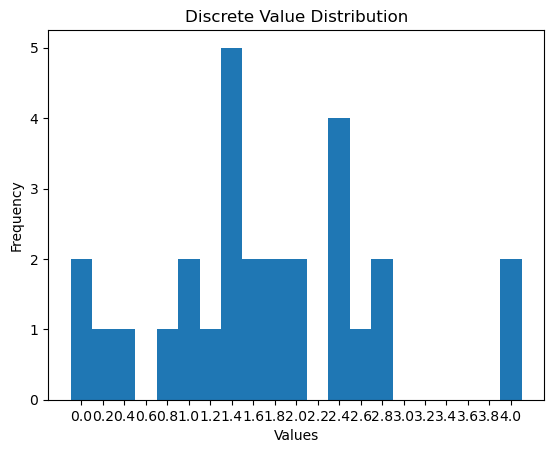

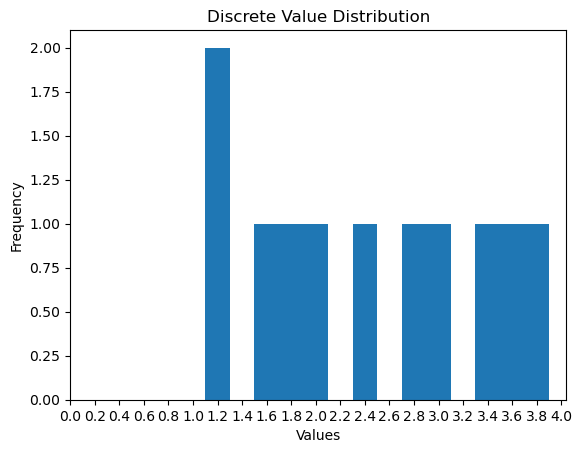

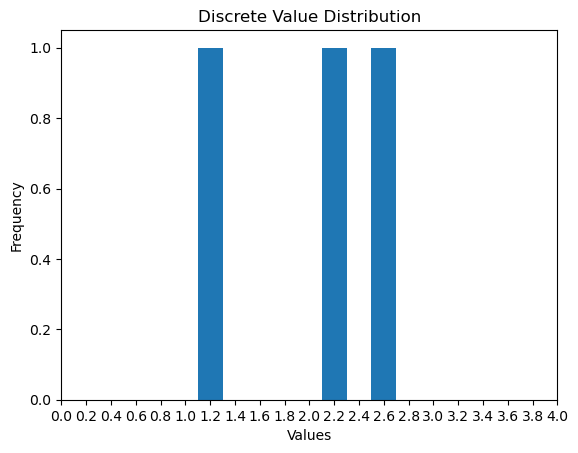

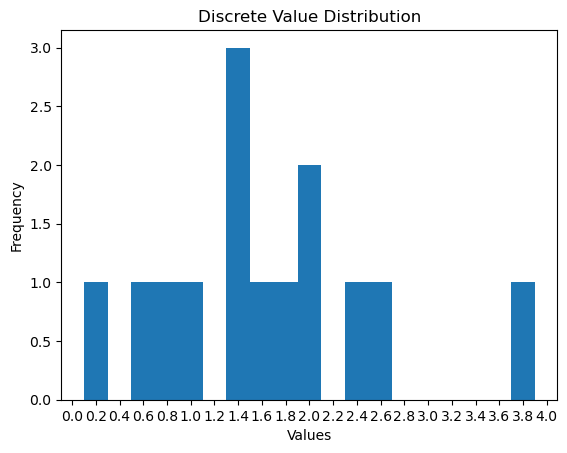

In [4]:
patient_ids = np.loadtxt(osp.join(osp.dirname(analysis.__file__), 'labels.txt'))
per_patient_worst = []
per_patient_worst_labels = []

for p in range(4):
    patient_ids_out = [p]
    patient_indices = [i for i, x in enumerate(patient_ids) if x in patient_ids_out]
    #
    # plot_dist(labels)
    per_patient_worst_indices = [i for i in bad_pred_indices if i in patient_indices]
    per_patient_worst.append(per_patient_worst_indices)

    labels = [label_list[i] for i in per_patient_worst_indices]
    per_patient_worst_labels.append(labels)
    plot_dist(labels)

In [3]:
torch.cuda.set_device(1)

configs = {
    'pretrain': 'None',
    'img_size': 512,
    'model': 'Resnet18',
    'epochs': 100,
    'batch_size': 32,
    'weight_decay': 1e-3,
    'lr': 1e-4,
    'min_lr': 0.000006463,
    'RandomHorizontalFlip': True,
    'RandomVerticalFlip': True,
    'RandomRotation': True,
    'ZoomIn': False,
    'ZoomOut': False,
    'use_mix': False,
    'use_avg': False,
    'XShift': False,
    'YShift': False,
    'RandomShear': False,
    'max_shear': 30,  # value in degrees
    'max_shift': 0.5,
    'rotation_angle': 3,
    'zoomin_factor': 0.95,
    'zoomout_factor': 0.05,
}

imgs_list, label_list = create_datalists()

test_dataset, _ = create_datasets(imgs_list, label_list, configs, final_train=True,
                                  patients_out=False, patient_ids_out=[1, 2, 3])
print(len(test_dataset))

model = get_model({'model': 'DNCNN', 'pretrain': 'None'})
model.load_state_dict(torch.load(osp.join(osp.dirname(output.__file__), 'DNCNN_epoch_179_alldata.pth'), map_location="cpu"), strict=True)
model = model.cuda()

bad_pred_indices = valid(model, test_dataset, 0, 0, 0, False, loss_threshold=0.5)
len(bad_pred_indices)

1000


validation:   0%|          | 2/1000 [00:00<02:39,  6.24it/s]

diff: -0.046494007
#
diff: 0.08265185
#


validation:   2%|▏         | 16/1000 [00:00<00:23, 42.63it/s]

diff: 0.11779785
#
diff: 0.3178594
#
diff: -0.012294769
#
diff: 0.35591412
#
diff: -0.36020312
#
diff: -0.24890447
#
diff: 0.12295391
#
diff: -0.052763343
#
diff: -0.11035037
#
diff: 0.07826066
#
diff: 0.20527607
#
diff: 0.20961499
#
diff: 0.10757244
#
diff: -0.18507457
#
diff: -0.06913662
#
diff: -0.16497108
#
diff: 0.15053415
#
diff: -0.35921335
#


validation:   3%|▎         | 34/1000 [00:00<00:14, 64.80it/s]

diff: -0.15576851
#
diff: -0.03386672
#
diff: -0.07407117
#
diff: 0.18510175
#
diff: -0.15894836
#
diff: -0.078270435
#
diff: -0.40130872
#
diff: -0.09543109
#
diff: 0.22379684
#
diff: -0.2878155
#
diff: 0.13150239
#
diff: 0.063159704
#
diff: -0.07314265
#
diff: 0.09425104
#
diff: -0.48042464
#
diff: -0.51420975
tensor(True, device='cuda:1')
#
diff: -0.2677629
#
diff: -0.24953485
#


validation:   5%|▌         | 52/1000 [00:00<00:12, 74.85it/s]

diff: 0.0006148815
#
diff: -0.07334995
#
diff: -0.053204775
#
diff: -0.10368967
#
diff: 0.12890339
#
diff: -0.2581072
#
diff: 0.1590445
#
diff: 0.15805578
#
diff: 0.056566775
#
diff: 0.094984055
#
diff: 0.37224126
#
diff: 0.12218189
#
diff: 0.027536511
#
diff: 0.06662631
#
diff: -0.10331631
#
diff: 0.21607924
#
diff: 0.15609372
#


validation:   7%|▋         | 70/1000 [00:01<00:11, 78.85it/s]

diff: 0.04979086
#
diff: 0.21668649
#
diff: -0.39513075
#
diff: 0.69743216
tensor(True, device='cuda:1')
#
diff: -0.32410622
#
diff: 0.1028626
#
diff: 0.043779135
#
diff: -0.044727683
#
diff: 0.19356704
#
diff: 0.044914484
#
diff: 0.36103797
#
diff: -0.33617175
#
diff: -0.16939515
#
diff: -0.009983778
#
diff: 0.23923492
#
diff: 0.011385918
#
diff: 0.15841734
#
diff: -0.27210307
#


validation:   9%|▉         | 88/1000 [00:01<00:11, 80.65it/s]

diff: 0.38401255
#
diff: 0.26084626
#
diff: 0.48521614
#
diff: 0.1754198
#
diff: 0.23725891
#
diff: -0.26623535
#
diff: -0.24917442
#
diff: 0.012732476
#
diff: 0.06996326
#
diff: -0.17165685
#
diff: 0.15339935
#
diff: 0.16285157
#
diff: -0.1030345
#
diff: 0.23938751
#
diff: -0.3181789
#
diff: -0.22056341
#
diff: 0.057012796
#


validation:  11%|█         | 106/1000 [00:01<00:10, 82.88it/s]

diff: -0.2429493
#
diff: -0.014029026
#
diff: 0.1556933
#
diff: -0.003950119
#
diff: 0.09110735
#
diff: 0.17386562
#
diff: -0.34552753
#
diff: -0.217489
#
diff: -0.3426019
#
diff: 0.32828593
#
diff: -0.29880595
#
diff: -0.39271688
#
diff: -0.23751664
#
diff: 0.21339226
#
diff: 0.01525557
#
diff: 0.06138289
#
diff: -0.068361044
#
diff: 0.19556123
#
diff: -0.15562725
#


validation:  12%|█▏        | 124/1000 [00:01<00:10, 83.30it/s]

diff: 0.06490016
#
diff: -0.004649639
#
diff: -0.07348089
#
diff: -0.5782543
tensor(True, device='cuda:1')
#
diff: -0.23519802
#
diff: -0.33455992
#
diff: 0.15493983
#
diff: 0.1314447
#
diff: 0.34868467
#
diff: -0.06732583
#
diff: 0.020928577
#
diff: -0.53337324
tensor(True, device='cuda:1')
#
diff: -0.34006238
#
diff: -0.35485458
#
diff: -0.13354874
#
diff: -0.40863353
#
diff: -0.22856712
#
diff: 0.02825296
#


validation:  14%|█▍        | 142/1000 [00:02<00:10, 83.09it/s]

diff: 0.1474308
#
diff: 0.011077881
#
diff: 0.18327713
#
diff: -0.067371726
#
diff: 0.1661911
#
diff: -0.39324093
#
diff: 0.19456816
#
diff: 0.0715301
#
diff: -0.2578268
#
diff: 0.021728992
#
diff: 0.22288328
#
diff: -0.39323997
#
diff: -0.17232394
#
diff: 0.06052637
#
diff: -0.28237975
#
diff: 0.15821946
#
diff: -0.24033713
#


validation:  16%|█▌        | 160/1000 [00:02<00:10, 83.53it/s]

diff: 0.08831549
#
diff: -0.25148487
#
diff: -0.115276575
#
diff: 0.18262827
#
diff: 0.14004925
#
diff: -0.23999
#
diff: 0.17181674
#
diff: 0.14682245
#
diff: -0.0077643394
#
diff: -0.10041273
#
diff: 0.2682619
#
diff: -0.5645747
tensor(True, device='cuda:1')
#
diff: -0.3513322
#
diff: 0.018507957
#
diff: -0.49025345
#
diff: 0.1100955
#


validation:  17%|█▋        | 169/1000 [00:02<00:09, 83.32it/s]

diff: -0.16777468
#
diff: 0.20234323
#
diff: 0.15226078
#
diff: -0.042710066
#
diff: 0.09780002
#
diff: 0.34307146
#
diff: -0.2539034
#
diff: 0.10434461
#
diff: 0.089393735
#
diff: 0.045588255
#
diff: -0.014965653
#
diff: -0.33533025
#
diff: -0.6904845
tensor(True, device='cuda:1')
#
diff: 0.018240213
#
diff: 0.20018184
#
diff: -0.2044177
#
diff: 0.066996574
#


validation:  19%|█▊        | 187/1000 [00:02<00:09, 82.94it/s]

diff: 0.09326863
#
diff: -0.41606575
#
diff: 0.7009187
tensor(True, device='cuda:1')
#
diff: -0.13181138
#
diff: 0.24362314
#
diff: -0.4166171
#
diff: 0.090550125
#
diff: -0.36535072
#
diff: -0.4734304
#
diff: 0.086987734
#
diff: 0.12213914
#
diff: 0.098095275
#
diff: 0.4059801
#
diff: 0.101842165
#
diff: -0.2988456
#
diff: 0.30050063
#
diff: 0.31561685
#
diff: -0.037511945
#


validation:  20%|██        | 205/1000 [00:02<00:09, 83.39it/s]

diff: 0.27294922
#
diff: -0.57915735
tensor(True, device='cuda:1')
#
diff: -0.03464806
#
diff: 0.22099674
#
diff: -0.15627575
#
diff: 0.49203348
#
diff: -0.3916434
#
diff: -0.0019314289
#
diff: -0.2256248
#
diff: -0.2843169
#
diff: 0.14438725
#
diff: 0.066548824
#
diff: 0.28524184
#
diff: 0.10305908
#
diff: 0.120571375
#
diff: -0.061116934
#
diff: -0.1742394
#
diff: 0.0058439076
#
diff: 0.040807664


validation:  22%|██▏       | 223/1000 [00:03<00:09, 84.72it/s]

#
diff: -0.13619971
#
diff: 0.0511868
#
diff: 0.029673338
#
diff: -0.15146446
#
diff: -0.036718607
#
diff: 0.20583361
#
diff: 0.1264646
#
diff: 0.033738375
#
diff: 0.09707868
#
diff: 0.21738541
#
diff: 0.6778078
tensor(True, device='cuda:1')
#
diff: 0.15704477
#
diff: -0.17762661
#
diff: -0.04195261
#
diff: 0.16408348
#
diff: -0.41006637
#


validation:  24%|██▍       | 241/1000 [00:03<00:09, 83.68it/s]

diff: -0.12726927
#
diff: -0.18719411
#
diff: -0.13715124
#
diff: -0.010704994
#
diff: -0.26833534
#
diff: 0.15678103
#
diff: -0.11241591
#
diff: -0.3833741
#
diff: -0.29659677
#
diff: -0.13020128
#
diff: 0.25524604
#
diff: 0.02471602
#
diff: -0.058876753
#
diff: 0.33695018
#
diff: -0.13748324
#
diff: -0.70766926
tensor(True, device='cuda:1')
#
diff: 0.13934398
#
diff: -0.8337238
tensor(True, device='cuda:1')
#


validation:  26%|██▌       | 259/1000 [00:03<00:08, 83.33it/s]

diff: 0.43050575
#
diff: -0.0065909624
#
diff: -0.024490356
#
diff: -0.1990447
#
diff: -0.0711849
#
diff: -0.18543112
#
diff: -0.1144743
#
diff: -0.49412465
#
diff: 0.11930269
#
diff: -0.050886393
#
diff: -0.5225954
tensor(True, device='cuda:1')
#
diff: -0.17444497
#
diff: -0.14446998
#
diff: 0.18540645
#
diff: 0.23679936
#
diff: 0.21564364
#
diff: -0.00080400705
#
diff: 0.34332848
#


validation:  28%|██▊       | 277/1000 [00:03<00:08, 83.70it/s]

diff: 0.10320319
#
diff: 0.058843374
#
diff: 0.36224484
#
diff: -0.1075356
#
diff: 0.23365664
#
diff: -0.050721645
#
diff: 0.37291503
#
diff: 0.011943579
#
diff: -0.11547685
#
diff: -0.12162852
#
diff: 0.07850909
#
diff: -0.14484751
#
diff: -0.2546351
#
diff: -0.54587984
tensor(True, device='cuda:1')
#
diff: -0.5285964
tensor(True, device='cuda:1')
#
diff: 0.09369976
#
diff: -0.13662344
#


validation:  30%|██▉       | 295/1000 [00:03<00:08, 83.98it/s]

diff: 0.30127895
#
diff: -0.33726406
#
diff: -0.03259176
#
diff: 0.0012888908
#
diff: -0.14466572
#
diff: -0.8584734
tensor(True, device='cuda:1')
#
diff: -0.12605715
#
diff: 0.068345785
#
diff: 0.23388624
#
diff: -0.25765014
#
diff: 0.105994225
#
diff: 0.099186875
#
diff: 0.26016074
#
diff: -0.1655227
#
diff: 0.2456063
#
diff: 0.017087936
#
diff: 0.019496918
#


validation:  31%|███▏      | 313/1000 [00:04<00:08, 83.88it/s]

diff: -0.17049766
#
diff: 0.07385087
#
diff: 0.13588357
#
diff: -0.3486755
#
diff: -0.17461085
#
diff: -0.528147
tensor(True, device='cuda:1')
#
diff: 0.12054336
#
diff: -0.24478912
#
diff: -0.0689913
#
diff: -0.52181613
tensor(True, device='cuda:1')
#
diff: 0.14230013
#
diff: 0.17866325
#
diff: -0.17540216
#
diff: -0.07164216
#
diff: 0.086005084
#
diff: -0.12968302
#
diff: -0.10039377
#


validation:  33%|███▎      | 331/1000 [00:04<00:07, 84.00it/s]

diff: 0.3428409
#
diff: 0.10005593
#
diff: -0.020103455
#
diff: -0.0013099909
#
diff: -0.32088327
#
diff: -0.020657778
#
diff: -0.13442516
#
diff: -0.37992346
#
diff: -0.10809684
#
diff: -0.2747798
#
diff: -0.12396026
#
diff: -0.24588084
#
diff: -0.091809966
#
diff: -0.50482816
tensor(True, device='cuda:1')
#
diff: -0.117628574
#
diff: 0.075095296
#
diff: 0.15867078
#
diff: -0.24643373
#


validation:  35%|███▍      | 349/1000 [00:04<00:07, 83.51it/s]

diff: -0.13861263
#
diff: 0.21095419
#
diff: -0.24940038
#
diff: -0.1167233
#
diff: 0.04583049
#
diff: -0.12421107
#
diff: 0.6731775
tensor(True, device='cuda:1')
#
diff: 0.052271128
#
diff: -0.109998114
#
diff: -0.22577143
#
diff: -0.079533696
#
diff: -0.26846647
#
diff: 0.24210238
#
diff: -0.35895896
#
diff: -0.33128893
#
diff: 0.0042557716
#
diff: 0.26546586
#
diff: -0.08771205


validation:  37%|███▋      | 367/1000 [00:04<00:07, 84.00it/s]

#
diff: -0.15566015
#
diff: 0.061520338
#
diff: -0.2239703
#
diff: -0.07880968
#
diff: 0.10397756
#
diff: 0.10808954
#
diff: 0.07888067
#
diff: 0.0047380924
#
diff: 0.008927107
#
diff: 0.030869007
#
diff: 0.037453294
#
diff: -0.7382703
tensor(True, device='cuda:1')
#
diff: 0.06555343
#
diff: -0.06358838
#
diff: 0.27107716
#
diff: -0.19879162
#
diff: 0.014964819
#


validation:  38%|███▊      | 385/1000 [00:04<00:07, 84.11it/s]

diff: 0.09302327
#
diff: 0.26283348
#
diff: 0.035167217
#
diff: -0.2800963
#
diff: 0.6945291
tensor(True, device='cuda:1')
#
diff: -0.41421813
#
diff: 0.13449463
#
diff: 0.076935574
#
diff: 0.27661538
#
diff: 0.12987447
#
diff: 0.22572035
#
diff: 0.061826587
#
diff: -0.26967478
#
diff: -0.3157087
#
diff: -0.3507223
#
diff: 0.018826485
#
diff: -0.21206689
#
diff: -0.35077858
#


validation:  40%|████      | 403/1000 [00:05<00:07, 84.46it/s]

diff: 0.09318465
#
diff: -0.41453952
#
diff: -0.23843205
#
diff: 0.17597032
#
diff: -0.073890746
#
diff: 0.26481438
#
diff: -0.18676925
#
diff: -0.014270306
#
diff: 0.056889057
#
diff: 0.036224604
#
diff: -0.10714269
#
diff: -0.45459354
#
diff: -0.53656983
tensor(True, device='cuda:1')
#
diff: -0.4137984
#
diff: -0.08675349
#
diff: 0.26197702
#
diff: 0.06952106
#
diff: -0.21121907
#


validation:  42%|████▏     | 421/1000 [00:05<00:06, 85.39it/s]

diff: -0.10831356
#
diff: 0.014883995
#
diff: -0.18347049
#
diff: -0.06620669
#
diff: -0.03720528
#
diff: 0.092712164
#
diff: -0.17217231
#
diff: -0.12052977
#
diff: 0.25404048
#
diff: 0.04333526
#
diff: -0.07092047
#
diff: -0.49669695
#
diff: -0.2172432
#
diff: -0.06857383
#
diff: -0.18832183
#
diff: 0.050876617
#
diff: -0.14197707
#
diff: -0.1372289
#


validation:  44%|████▍     | 439/1000 [00:05<00:06, 84.91it/s]

diff: 0.19386798
#
diff: -0.056773424
#
diff: 0.18711567
#
diff: 0.0014026165
#
diff: -0.61943996
tensor(True, device='cuda:1')
#
diff: -0.04200387
#
diff: 0.16685843
#
diff: 0.10325694
#
diff: 0.09769058
#
diff: 0.01738596
#
diff: -0.42098665
#
diff: 0.1435659
#
diff: -0.61850476
tensor(True, device='cuda:1')
#
diff: 0.22831738
#
diff: -0.19998765
#
diff: -0.009209871
#
diff: 0.07054847
#


validation:  45%|████▍     | 448/1000 [00:05<00:06, 85.00it/s]

diff: -0.02682066
#
diff: 0.07162142
#
diff: 0.4027685
#
diff: 0.49984682
#
diff: -0.17330238
#
diff: -0.16882205
#
diff: -0.18318999
#
diff: -0.42427886
#
diff: 0.30628085
#
diff: 0.08279705
#
diff: -0.076707125
#
diff: 0.11444223
#
diff: -0.3643713
#
diff: -0.08976114
#
diff: 0.19522476
#
diff: -0.10933161
#


validation:  47%|████▋     | 466/1000 [00:05<00:06, 84.23it/s]

diff: 0.34545445
#
diff: -0.28537047
#
diff: 0.21174002
#
diff: 0.12569761
#
diff: -0.19437456
#
diff: -0.16203666
#
diff: -0.63146186
tensor(True, device='cuda:1')
#
diff: -0.15012252
#
diff: -0.060902834
#
diff: -0.09624159
#
diff: -0.33399355
#
diff: 0.24467297
#
diff: 0.11345556
#
diff: 0.07689357
#
diff: -0.24543643
#
diff: 0.20963192
#
diff: 0.00031208992
#


validation:  48%|████▊     | 484/1000 [00:06<00:06, 84.71it/s]

diff: -0.15083432
#
diff: -0.1288189
#
diff: -0.23451018
#
diff: -0.10784316
#
diff: 0.13433862
#
diff: 0.36193275
#
diff: -0.049212217
#
diff: -0.055667877
#
diff: -0.28160262
#
diff: 0.15601015
#
diff: -0.38397694
#
diff: 0.08352053
#
diff: -0.10930741
#
diff: 0.14837754
#
diff: -0.47597623
#
diff: -0.27853316
#
diff: 0.47961593
#
diff: -0.038642883
#


validation:  50%|█████     | 502/1000 [00:06<00:05, 84.91it/s]

diff: 0.14441061
#
diff: -0.17778969
#
diff: -0.023401499
#
diff: 0.5691242
tensor(True, device='cuda:1')
#
diff: 0.16132958
#
diff: -0.13574743
#
diff: 0.04309106
#
diff: -0.41355145
#
diff: -0.19401622
#
diff: 0.085387945
#
diff: -0.10626924
#
diff: -0.45566726
#
diff: 0.07111573
#
diff: 0.017363548
#
diff: 0.006648183
#
diff: -0.030029535
#
diff: -0.05756569
#
diff: -0.2158544
#


validation:  52%|█████▏    | 520/1000 [00:06<00:05, 85.03it/s]

diff: -0.09793103
#
diff: 0.15856957
#
diff: -0.10945773
#
diff: 0.06357956
#
diff: 0.09680438
#
diff: -0.19314647
#
diff: -0.074178696
#
diff: 0.03445053
#
diff: -0.23931587
#
diff: -0.115507364
#
diff: -0.1137563
#
diff: -0.0027182102
#
diff: -0.3179183
#
diff: -0.08523226
#
diff: 0.15305589
#
diff: 0.27078724
#
diff: -0.068155766
#


validation:  54%|█████▍    | 538/1000 [00:06<00:05, 84.87it/s]

diff: -0.09554052
#
diff: 0.13793361
#
diff: -0.19282174
#
diff: 0.049863577
#
diff: 0.026281
#
diff: 0.005722046
#
diff: -0.2753291
#
diff: -0.066465616
#
diff: -0.7474154
tensor(True, device='cuda:1')
#
diff: -0.13260245
#
diff: -0.30300832
#
diff: -0.037632227
#
diff: -0.1672678
#
diff: 0.1328919
#
diff: -0.110421896
#
diff: 0.019302845
#
diff: -0.3784709
#


validation:  56%|█████▌    | 556/1000 [00:06<00:05, 84.43it/s]

diff: 0.41181493
#
diff: 0.04131794
#
diff: -0.25717187
#
diff: 0.15652144
#
diff: -0.016708374
#
diff: 0.0491879
#
diff: 0.23035955
#
diff: -0.08884263
#
diff: -0.039436102
#
diff: 0.39732027
#
diff: 0.07098174
#
diff: -0.26906383
#
diff: 0.22561288
#
diff: 0.3126514
#
diff: 0.18779111
#
diff: 0.05104184
#
diff: -0.42891705
#


validation:  57%|█████▋    | 574/1000 [00:07<00:05, 84.99it/s]

diff: 0.028709173
#
diff: 0.26652563
#
diff: -0.18149042
#
diff: -0.28553498
#
diff: 0.16826367
#
diff: 0.0130018
#
diff: 0.06824732
#
diff: 0.09399009
#
diff: -0.17482424
#
diff: 0.25019217
#
diff: -0.08267999
#
diff: -0.4501257
#
diff: 0.015373349
#
diff: -0.16568255
#
diff: 0.029619813
#
diff: -0.4662031
#
diff: -0.06174755
#
diff: 0.19023192
#


validation:  59%|█████▉    | 592/1000 [00:07<00:04, 83.73it/s]

diff: -0.31050587
#
diff: -0.23630577
#
diff: 0.1481837
#
diff: 0.13883984
#
diff: -0.08364153
#
diff: -0.017006874
#
diff: 0.022519112
#
diff: -0.33596385
#
diff: 0.17388809
#
diff: -0.4026866
#
diff: -0.051238537
#
diff: 0.16319013
#
diff: -0.1784932
#
diff: -0.09519577
#
diff: 0.1903472
#
diff: 0.21445411
#
diff: 0.044244766
#
diff: 0.10697341
#


validation:  61%|██████    | 610/1000 [00:07<00:04, 83.90it/s]

diff: -0.36719656
#
diff: -0.1880033
#
diff: -0.17111325
#
diff: 0.07415241
#
diff: -0.018621564
#
diff: 0.08047986
#
diff: 0.13621652
#
diff: -0.05031395
#
diff: 0.4690151
#
diff: 0.09320092
#
diff: 0.088317156
#
diff: 0.32120013
#
diff: -0.029623508
#
diff: -0.1059494
#
diff: 0.17029363
#
diff: 0.2926669
#
diff: -0.06612897
#
diff: 0.12561655
#


validation:  63%|██████▎   | 628/1000 [00:07<00:04, 83.13it/s]

diff: -0.20234251
#
diff: -0.2505896
#
diff: -0.21717596
#
diff: 0.23191094
#
diff: -0.23985231
#
diff: -0.35834742
#
diff: -0.10820329
#
diff: -0.36522508
#
diff: 0.35751128
#
diff: -0.13092637
#
diff: -0.11880243
#
diff: 0.004691839
#
diff: -0.06394851
#
diff: 0.06313324
#
diff: -0.13874054
#
diff: -0.49239045
#


validation:  65%|██████▍   | 646/1000 [00:08<00:04, 83.94it/s]

diff: 0.3889197
#
diff: -0.21240807
#
diff: 0.21788788
#
diff: 0.47599626
#
diff: -0.45123148
#
diff: -0.020611286
#
diff: 0.258685
#
diff: 0.02017212
#
diff: -0.045313597
#
diff: -0.0035015345
#
diff: 0.043195724
#
diff: 0.12635946
#
diff: 0.020437956
#
diff: -0.18434668
#
diff: 0.33713746
#
diff: -0.065362215
#
diff: -0.49227428
#
diff: -0.31984842
#
diff: -0.058576345
#


validation:  66%|██████▋   | 664/1000 [00:08<00:03, 84.69it/s]

diff: -0.1649208
#
diff: 0.31283045
#
diff: 0.1495719
#
diff: -0.12309098
#
diff: 0.5271964
tensor(True, device='cuda:1')
#
diff: 0.8189595
tensor(True, device='cuda:1')
#
diff: 0.043886185
#
diff: 0.1527856
#
diff: -0.29003638
#
diff: -0.10780549
#
diff: -0.152946
#
diff: -0.22652328
#
diff: 0.10231066
#
diff: -0.062824726
#
diff: -0.13047433
#
diff: -0.049796224
#
diff: 0.25453225
#
diff: 0.4814576
#


validation:  68%|██████▊   | 682/1000 [00:08<00:03, 84.09it/s]

diff: -0.17856431
#
diff: -0.11275399
#
diff: 0.09253316
#
diff: -0.11787242
#
diff: 0.38910735
#
diff: 0.058031917
#
diff: -0.2844857
#
diff: 0.064067364
#
diff: 0.28493094
#
diff: -0.33304083
#
diff: 0.27832508
#
diff: -0.15438724
#
diff: 0.26670623
#
diff: -0.124727905
#
diff: -0.120111465
#
diff: 0.2365334
#
diff: 0.00059366226
#
diff: -0.0036559105
#


validation:  70%|███████   | 700/1000 [00:08<00:03, 83.94it/s]

diff: -0.081048965
#
diff: -0.45910358
#
diff: 0.022373736
#
diff: -0.17288637
#
diff: 0.15250707
#
diff: -0.07021761
#
diff: -0.23870909
#
diff: 0.06959665
#
diff: -0.37533283
#
diff: -0.33371925
#
diff: 0.032105684
#
diff: 0.12657166
#
diff: 0.42913866
#
diff: -0.28245223
#
diff: 0.23871374
#
diff: 0.010475874
#
diff: -0.14207578
#
diff: -0.1743877
#


validation:  72%|███████▏  | 718/1000 [00:08<00:03, 85.40it/s]

diff: -0.14026546
#
diff: 0.24653435
#
diff: 0.09357256
#
diff: -0.24648905
#
diff: 0.1903841
#
diff: -0.12731433
#
diff: 0.09353638
#
diff: -0.3043406
#
diff: -0.18790817
#
diff: 0.16343069
#
diff: -0.000674963
#
diff: -0.2609352
#
diff: 0.03315115
#
diff: -0.014560342
#
diff: -0.064068556
#
diff: -0.2310884
#
diff: 0.17940603
#
diff: 0.1391995
#
diff: 0.15641272
#


validation:  74%|███████▎  | 736/1000 [00:09<00:03, 84.78it/s]

diff: 0.0010957718
#
diff: 0.07549262
#
diff: 0.11906767
#
diff: 0.25979114
#
diff: -0.05482745
#
diff: 0.03815067
#
diff: -0.026538372
#
diff: 0.014000773
#
diff: -0.23655856
#
diff: -0.5401163
tensor(True, device='cuda:1')
#
diff: 0.11603987
#
diff: -0.10470784
#
diff: -0.06335282
#
diff: -0.2689271
#
diff: -0.6189435
tensor(True, device='cuda:1')
#
diff: 0.22514796
#
diff: 0.6649776
tensor(True, device='cuda:1')
#
diff: -0.012463748
#


validation:  75%|███████▌  | 754/1000 [00:09<00:02, 85.64it/s]

diff: -0.4479016
#
diff: 0.10127425
#
diff: -0.008293033
#
diff: -0.016308546
#
diff: 0.33179837
#
diff: 0.12884665
#
diff: -0.018189669
#
diff: -0.09204322
#
diff: -0.7296393
tensor(True, device='cuda:1')
#
diff: -0.20956707
#
diff: 0.10784006
#
diff: 0.25169897
#
diff: -0.41794753
#
diff: -0.4270537
#
diff: -0.13620639
#
diff: 0.014208913
#
diff: 0.021199226
#
diff: 0.21263194
#
diff: 0.09487785
#


validation:  77%|███████▋  | 772/1000 [00:09<00:02, 84.64it/s]

diff: 0.1083729
#
diff: 0.11491823
#
diff: 0.067024946
#
diff: -0.22978961
#
diff: -0.20301652
#
diff: -0.06838727
#
diff: -0.03249359
#
diff: -0.029288888
#
diff: 0.102348804
#
diff: -0.47541785
#
diff: 0.16734862
#
diff: -0.25057244
#
diff: 0.32533193
#
diff: -0.19931853
#
diff: -0.23568177
#
diff: 0.1187745
#
diff: 0.12861669
#
diff: 0.045419693
#
diff: 0.016854033
#


validation:  79%|███████▉  | 790/1000 [00:09<00:02, 84.43it/s]

diff: -0.08213025
#
diff: -0.35632467
#
diff: -0.23000556
#
diff: 0.056034088
#
diff: 0.2198472
#
diff: -0.32947373
#
diff: -0.003298223
#
diff: -0.017367363
#
diff: -0.24972928
#
diff: -0.36160243
#
diff: -0.23162425
#
diff: -0.14256889
#
diff: 0.08216859
#
diff: -0.04478097
#
diff: -0.40150595
#
diff: -0.14556766
#
diff: 0.023622036
#
diff: 0.1968143
#


validation:  81%|████████  | 808/1000 [00:09<00:02, 84.55it/s]

diff: -0.7265436
tensor(True, device='cuda:1')
#
diff: -0.27145684
#
diff: 0.41619933
#
diff: 0.069147944
#
diff: -0.1822958
#
diff: 0.2862823
#
diff: 0.02665615
#
diff: 0.104371786
#
diff: -0.10324144
#
diff: 0.0853014
#
diff: -0.055954576
#
diff: -0.028906465
#
diff: 0.18243146
#
diff: 0.4596819
#
diff: -0.5421251
tensor(True, device='cuda:1')
#
diff: -0.24232674
#
diff: 0.12408495
#


validation:  83%|████████▎ | 826/1000 [00:10<00:02, 83.79it/s]

diff: 0.20057774
#
diff: 0.45930716
#
diff: -0.10525203
#
diff: 0.2184236
#
diff: -0.03627205
#
diff: -0.7100289
tensor(True, device='cuda:1')
#
diff: 0.028635263
#
diff: 0.13100374
#
diff: 0.0972538
#
diff: 0.19277287
#
diff: 0.22310281
#
diff: -0.03407383
#
diff: -0.03928864
#
diff: -0.118368626
#
diff: 0.22057056
#
diff: -0.035381556
#
diff: 0.117824554
#
diff: -0.14046216
#
diff: -0.3412063
#


validation:  84%|████████▍ | 844/1000 [00:10<00:01, 85.20it/s]

diff: -0.12547803
#
diff: -0.20570016
#
diff: 0.11987734
#
diff: -0.009055138
#
diff: -0.23365879
#
diff: 0.01355052
#
diff: 0.06543589
#
diff: -0.31165743
#
diff: 0.10084391
#
diff: -0.22585034
#
diff: 0.06936979
#
diff: -0.0671885
#
diff: -0.10651052
#
diff: -0.17638874
#
diff: 0.06843138
#
diff: -0.21460235
#
diff: -0.27595854
#


validation:  86%|████████▌ | 862/1000 [00:10<00:01, 83.80it/s]

diff: 0.03975463
#
diff: 0.33930314
#
diff: -0.34416556
#
diff: -0.44226718
#
diff: 0.23322552
#
diff: 0.3148175
#
diff: -0.082921505
#
diff: -0.42736053
#
diff: -0.08819485
#
diff: 0.20787334
#
diff: 0.030765265
#
diff: -0.19579959
#
diff: -0.010353327
#
diff: 0.26983237
#
diff: 0.11476922
#
diff: 0.51639783
tensor(True, device='cuda:1')
#
diff: -0.0014059544
#


validation:  88%|████████▊ | 880/1000 [00:10<00:01, 84.18it/s]

diff: -0.24939716
#
diff: -0.03675288
#
diff: -0.568408
tensor(True, device='cuda:1')
#
diff: -0.13197422
#
diff: -0.10866046
#
diff: 0.13018735
#
diff: -0.20008826
#
diff: -0.39667702
#
diff: 0.42783797
#
diff: 0.19007206
#
diff: -0.07927704
#
diff: 0.025644302
#
diff: -0.27258337
#
diff: -0.20372683
#
diff: 0.0321728
#
diff: -0.34284237
#
diff: 0.017840147
#
diff: -0.020277977
#


validation:  90%|████████▉ | 898/1000 [00:11<00:01, 84.04it/s]

diff: -0.22174692
#
diff: 0.070485115
#
diff: 0.08483297
#
diff: 0.04139781
#
diff: 0.07204747
#
diff: 0.03987193
#
diff: 0.08071208
#
diff: 0.1406169
#
diff: 0.0061924458
#
diff: 0.37080193
#
diff: 0.31083244
#
diff: 0.19071722
#
diff: 0.2979808
#
diff: -0.28293467
#
diff: -0.5196223
tensor(True, device='cuda:1')
#
diff: 0.2950461
#
diff: -0.047803283
#
diff: 0.08180475
#


validation:  92%|█████████▏| 916/1000 [00:11<00:00, 85.06it/s]

diff: 0.075603485
#
diff: -0.41745102
#
diff: -0.028875113
#
diff: -0.20253253
#
diff: -0.05815077
#
diff: 0.20635557
#
diff: 0.15202522
#
diff: 0.018145323
#
diff: 0.5195393
tensor(True, device='cuda:1')
#
diff: 0.253595
#
diff: 0.14744568
#
diff: -0.22589207
#
diff: -0.002634406
#
diff: 0.17313933
#
diff: 0.21529949
#
diff: -0.11716652
#
diff: 0.29597473
#
diff: -0.03078103
#


validation:  93%|█████████▎| 934/1000 [00:11<00:00, 84.50it/s]

diff: 0.33145905
#
diff: -0.107094884
#
diff: -0.3446095
#
diff: 0.014060974
#
diff: -0.19579768
#
diff: -0.10497379
#
diff: 0.102803335
#
diff: 0.08568406
#
diff: 0.025387317
#
diff: 0.05363822
#
diff: 0.012468219
#
diff: -0.1369586
#
diff: -0.15887237
#
diff: -0.13989425
#
diff: -0.08870602
#
diff: 0.12239075
#
diff: -0.063847065
#
diff: 0.08548021
#
diff: 0.23052923
#


validation:  95%|█████████▌| 952/1000 [00:11<00:00, 84.94it/s]

diff: -0.14101481
#
diff: -0.21702838
#
diff: -0.01450181
#
diff: 0.13140403
#
diff: 0.2242446
#
diff: 0.20601821
#
diff: -0.7569225
tensor(True, device='cuda:1')
#
diff: -0.15974301
#
diff: 0.25836468
#
diff: -0.039733887
#
diff: -0.27091122
#
diff: 0.06921601
#
diff: 0.2538165
#
diff: -0.51076156
tensor(True, device='cuda:1')
#
diff: -0.18590057
#
diff: 0.2840544
#
diff: 0.2719177
#
diff: -0.18354297
#


validation:  97%|█████████▋| 970/1000 [00:11<00:00, 84.57it/s]

diff: -0.11284542
#
diff: -0.46890688
#
diff: -0.2691567
#
diff: -0.40676284
#
diff: -0.1098147
#
diff: -0.1518426
#
diff: -0.05223322
#
diff: 0.012707055
#
diff: 0.062087536
#
diff: 0.1056625
#
diff: -0.11579588
#
diff: 0.27251273
#
diff: -0.12095106
#
diff: -0.01399374
#
diff: -0.090056896
#
diff: -0.62815833
tensor(True, device='cuda:1')
#
diff: -0.26601195
#
diff: 0.50615835
tensor(True, device='cuda:1')
#


validation:  99%|█████████▉| 988/1000 [00:12<00:00, 83.41it/s]

diff: -0.04771197
#
diff: -0.29766536
#
diff: 0.035669804
#
diff: -0.106277704
#
diff: -0.07157636
#
diff: -0.36022878
#
diff: -0.026435137
#
diff: 0.47750157
#
diff: 0.13580465
#
diff: 0.015116096
#
diff: -0.16231012
#
diff: 0.14899683
#
diff: 0.70229745
tensor(True, device='cuda:1')
#
diff: -0.07613814
#
diff: 0.26417422
#
diff: 0.16668773
#
diff: 0.8655289
tensor(True, device='cuda:1')
#
diff: 0.051760435
#
diff: 0.37791705
#


validation: 100%|██████████| 1000/1000 [00:12<00:00, 81.77it/s, plcc=0.974, srocc=0.974, krocc=0.877, overall=2.83, std=0.242]

diff: 0.52532434
tensor(True, device='cuda:1')
#
diff: -0.101792574
#
diff: -0.44648337
#
diff: -0.3080876
#
diff: -0.14112997
#


47

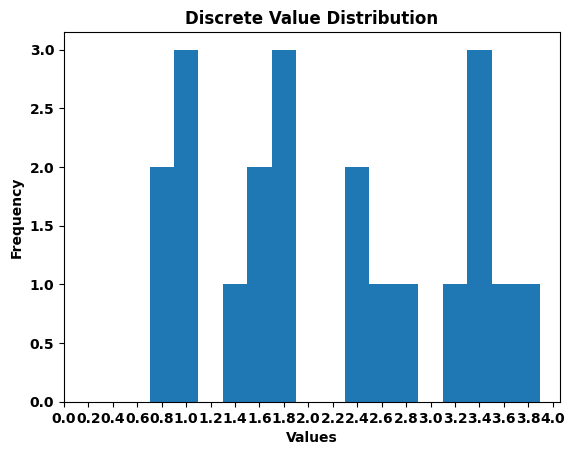

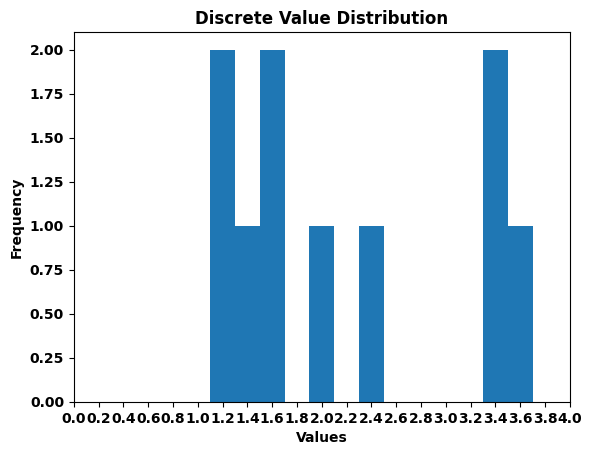

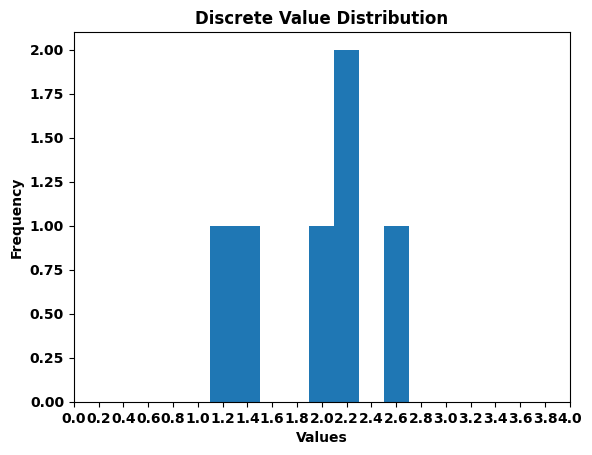

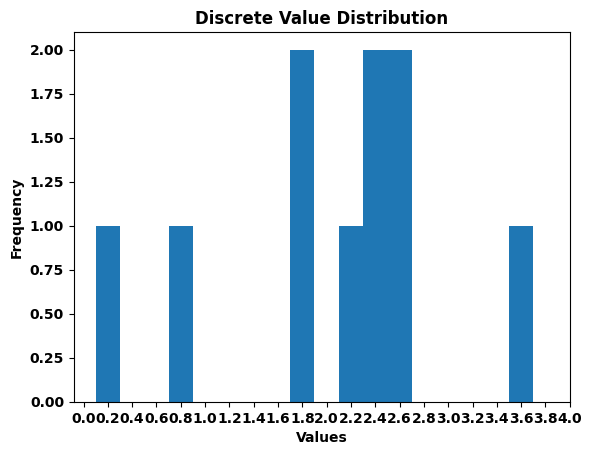

In [4]:
patient_ids = np.loadtxt(osp.join(osp.dirname(analysis.__file__), 'labels.txt'))
per_patient_worst = []
per_patient_worst_labels = []

for p in range(4):
    patient_ids_out = [p]
    patient_indices = [i for i, x in enumerate(patient_ids) if x in patient_ids_out]
    #
    # plot_dist(labels)
    per_patient_worst_indices = [i for i in bad_pred_indices if i in patient_indices]
    per_patient_worst.append(per_patient_worst_indices)

    labels = [label_list[i] for i in per_patient_worst_indices]
    per_patient_worst_labels.append(labels)
    plot_dist(labels)